# EXTERNAL DATASET

Los datos CIBIL externos, proporcionados por el Buró de Crédito de la India (CIBIL), contienen información crediticia suplementaria utilizada para evaluar la solvencia de los clientes. Incluyen el puntaje crediticio, historial de pagos, consultas sobre crédito y estado de aprobación de solicitudes. Además, registran métricas de morosidad, número de incumplimientos y nivel máximo de deuda en distintos períodos. Se incluyen variables sociodemográficas como edad, género, estado civil e ingresos netos mensuales. También se mide la utilización de tarjetas de crédito y préstamos personales, junto con la apertura y uso de líneas de crédito. Finalmente, se registran indicadores sobre la tenencia de productos financieros y consultas recientes, ofreciendo una visión integral del comportamiento crediticio del cliente.

## Definición General
Las siguientes variables corresponden a datos relevantes para la evaluación crediticia de los clientes, incluyendo historial de pagos, morosidad, consultas de crédito y datos demográficos.

### Variables y Descripciones

- **PROPECTID**: Identificador único asignado a cada cliente.

#### Historial de Pagos y Morosidad  

- **time_since_recent_payment**: Tiempo transcurrido desde que el cliente realizó su último pago.  

- **time_since_first_deliquency**: Tiempo transcurrido desde la primera vez que el cliente se atrasó en un pago.  

- **time_since_recent_deliquency**: Tiempo transcurrido desde la última vez que el cliente se atrasó en un pago.  

- **num_times_delinquent**: Número total de veces que el cliente ha incumplido con sus pagos.  

- **max_delinquency_level**: Nivel máximo de morosidad alcanzado por el cliente (por ejemplo, 90 días de retraso).  

- **max_recent_level_of_deliq**: Nivel máximo de morosidad en el período más reciente.  

- **num_deliq_6mts, num_deliq_12mts, num_deliq_6_12mts**: Número de incumplimientos en los últimos 6 meses, 12 meses y entre 6 y 12 meses, respectivamente.  

- **max_deliq_6mts, max_deliq_12mts**: Nivel máximo de morosidad en los últimos 6 y 12 meses, respectivamente.  

- **num_times_30p_dpd, num_times_60p_dpd**: Número de veces que el cliente ha estado más de 30 y 60 días, respectivamente, por encima de la fecha de pago.  

- **num_std, num_std_6mts, num_std_12mts**: Número total de pagos realizados a tiempo y en los últimos 6 y 12 meses, respectivamente.  

- **num_sub, num_sub_6mts, num_sub_12mts**: Número total de pagos parciales o incompletos y en los últimos 6 y 12 meses, respectivamente.  

- **num_dbt, num_dbt_6mts, num_dbt_12mts**: Número total de pagos dudosos y en los últimos 6 y 12 meses, respectivamente.  

- **num_lss, num_lss_6mts, num_lss_12mts**: Número total de cuentas consideradas como pérdidas y en los últimos 6 y 12 meses, respectivamente.  

- **recent_level_of_deliq**: Nivel de morosidad más reciente del cliente.  

#### Consultas de Crédito  

- **tot_enq**: Número total de consultas realizadas por el cliente sobre su historial crediticio.  

- **CC_enq, PL_enq**: Número de consultas específicas sobre tarjetas de crédito y préstamos personales, respectivamente.  

- **CC_enq_L6m, CC_enq_L12m, PL_enq_L6m, PL_enq_L12m**: Número de consultas sobre tarjetas de crédito y préstamos personales en los últimos 6 y 12 meses, respectivamente.  

- **time_since_recent_enq**: Tiempo transcurrido desde la última consulta realizada por el cliente.  

- **enq_L12m, enq_L6m, enq_L3m**: Número total de consultas en los últimos 12, 6 y 3 meses, respectivamente.  

#### Datos Demográficos y Económicos  

- **MARITALSTATUS**: Estado civil del cliente.  

- **EDUCATION**: Nivel educativo del cliente.  

- **AGE**: Edad del cliente.  

- **GENDER**: Género del cliente.  

- **NETMONTHLYINCOME**: Ingreso mensual neto del cliente.  

- **Time_With_Curr_Empr**: Tiempo que el cliente lleva trabajando en su empleo actual.  

#### Información sobre Cuentas y Utilización de Crédito  

- **pct_of_active_TLs_ever**: Porcentaje de cuentas activas en la historia del cliente.  

- **pct_opened_TLs_L6m_of_L12m**: Porcentaje de cuentas abiertas en los últimos 6 meses sobre las de los últimos 12 meses.  

- **pct_currentBal_all_TL**: Porcentaje de saldo pendiente sobre el total de préstamos.  

- **CC_utilization, PL_utilization**: Utilización de tarjetas de crédito y préstamos personales, respectivamente.  

#### Indicadores de Productos Financieros  

- **CC_Flag, PL_Flag, HL_Flag, GL_Flag**: Indicadores que señalan si el cliente tiene una tarjeta de crédito, préstamo personal, hipoteca o préstamo sobre oro, respectivamente.  

- **last_prod_enq2, first_prod_enq2**: Último y primer producto financiero consultado por el cliente.  

#### Evaluación Crediticia  

- **Credit_Score**: Puntuación de crédito asignada al cliente.  

- **Approved_Flag**: Indica si la solicitud de crédito del cliente fue aprobada o rechazada.  


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import os
import joblib
from modulos.data_description import *
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from itertools import combinations
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from scipy.stats import skew, chi2_contingency
from IPython.display import Markdown, display
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

## 1. Carga de datos

In [2]:
# Cargamos el dataset
ruta_binario = os.path.join('data', 'External_Cibil_Dataset.plk')
external = joblib.load(ruta_binario)

# Remplazamos el valor asignado como nulo para que no afecta al EDA
external.replace(-99999, np.nan, inplace=True)

In [3]:
# Visualizamos 5 primeras y 5 últimas líneas del dataframe
print(head_tail(external, 5))
print('-' * 50)

# Resumen estadístico de los datos numéricos
print(external.describe())
print('-' * 50)

# Resumen estadístico de los datos categóricos
print(external.describe(include='object'))

   PROSPECTID time_since_recent_payment time_since_first_deliquency  \
0           1                     549.0                        35.0   
1           2                      47.0                         NaN   
2           3                     302.0                        11.0   
3           4                       NaN                         NaN   
4           5                     583.0                         NaN   
5         ...                       ...                         ...   
6       51332                      15.0                        24.0   
7       51333                      57.0                         NaN   
8       51334                      32.0                         NaN   
9       51335                      58.0                         NaN   
10      51336                      74.0                         NaN   

   time_since_recent_deliquency num_times_delinquent max_delinquency_level  \
0                          15.0                   11                 

In [4]:
# Función que muestra la estructura de cada variable
for col in external.columns.tolist():
    describe_columna(external, col)

Columna: PROSPECTID  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 51336
Valores más frecuentes:
51336 	 1
1 	 1
2 	 1
3 	 1
4 	 1
5 	 1
6 	 1
7 	 1
51320 	 1
51319 	 1
Columna: time_since_recent_payment  -  Tipo de datos: float64
Número de valores nulos: 4291  -  Número de valores distintos: 2434
Valores más frecuentes:
51.0 	 606
49.0 	 605
63.0 	 604
52.0 	 580
54.0 	 570
59.0 	 567
67.0 	 555
50.0 	 554
66.0 	 548
47.0 	 542
Columna: time_since_first_deliquency  -  Tipo de datos: float64
Número de valores nulos: 35949  -  Número de valores distintos: 36
Valores más frecuentes:
35.0 	 1855
34.0 	 596
33.0 	 563
7.0 	 488
9.0 	 475
29.0 	 471
31.0 	 468
6.0 	 467
5.0 	 466
8.0 	 459
Columna: time_since_recent_deliquency  -  Tipo de datos: float64
Número de valores nulos: 35949  -  Número de valores distintos: 36
Valores más frecuentes:
2.0 	 1224
3.0 	 1091
4.0 	 1016
5.0 	 853
6.0 	 792
7.0 	 649
8.0 	 642
9.0 	 593
10.0 	 516
1.0 	 515
Columna:

### 1.1. Tipificación de datos

In [5]:
# Identificamos las columnas que deben ser booleanas
bool_features = []

# Filtramos columnas que contienen 'Flag' en el nombre y tienen menos de 8 caracteres
for col in external.columns:  
    if ('Flag' in col) & (len(col) < 8):
        bool_features.append(col)

# Convertimos las columnas identificadas a tipo booleano
external[bool_features] = external[bool_features].astype('bool')

## 2. Calidad del Dato

### 2.1. Valores Nulos

Mostrar cuántos valores nulos hay por columna y su porcentaje

In [6]:
# Contamos la cantidad de valores nulos por columna
q_nulos = external.isnull().sum()

# Filtramos solo las columnas que tienen valores nulos
q_nulos = q_nulos[q_nulos > 0]

# Calculamos el porcentaje de valores nulos respecto al total de filas
p_nulos = (q_nulos / len(external) * 100).round(2)

# Creamos un DataFrame con la cantidad y el porcentaje de valores nulos
df_nulos = pd.DataFrame({
    'Cantidad': q_nulos,
    'Porcentaje': p_nulos
}).sort_values(by='Cantidad', ascending=False)

# Imprimimos el DataFrame resultante
print(df_nulos)

                              Cantidad  Porcentaje
CC_utilization                   47636       92.79
PL_utilization                   44435       86.56
time_since_recent_deliquency     35949       70.03
max_delinquency_level            35949       70.03
time_since_first_deliquency      35949       70.03
max_unsec_exposure_inPct         23178       45.15
max_deliq_6mts                   12890       25.11
max_deliq_12mts                  10832       21.10
PL_enq_L12m                       6321       12.31
CC_enq_L12m                       6321       12.31
tot_enq                           6321       12.31
CC_enq                            6321       12.31
CC_enq_L6m                        6321       12.31
enq_L3m                           6321       12.31
PL_enq_L6m                        6321       12.31
PL_enq                            6321       12.31
time_since_recent_enq             6321       12.31
enq_L12m                          6321       12.31
enq_L6m                        

Representamos mediante una gráfica de barras la cantidad de valores nulos por variable

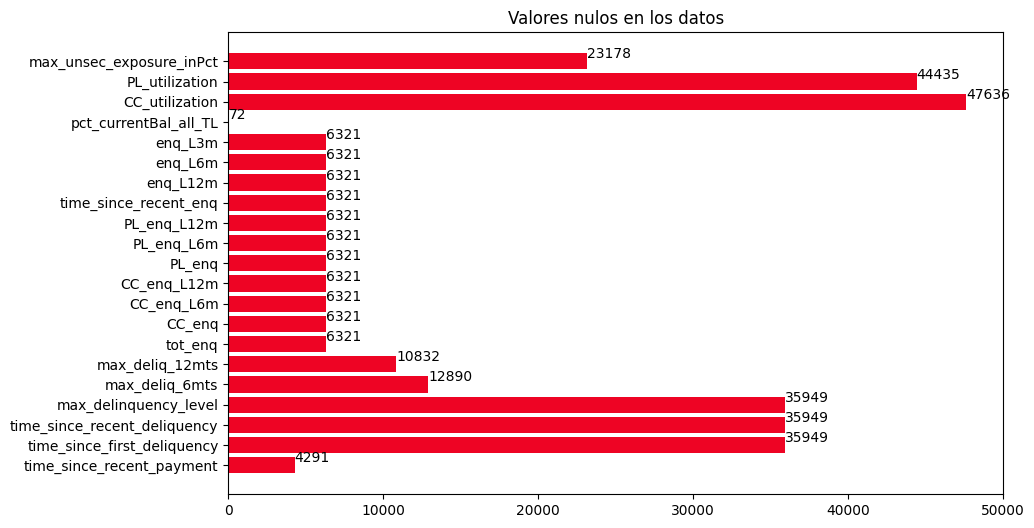

In [7]:
# Definimos el tamaño de la figura
plt.figure(figsize=(10, 6))

# Creamos el gráfico de barras horizontales
bars = plt.barh(y=q_nulos.index, width=q_nulos, color='#EE0424')

# Añadimos etiquetas con la cantidad de valores nulos en cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', 
             ha='left', va='bottom')

# Agregamos título al gráfico
plt.title('Valores nulos en los datos')

# Mostramos la gráfica
plt.show()

**A. CC_utilization + PL_utilization:** Ambas variables tienen un elevado numero de valores faltantes, pero es debido a que solo registra a aquellas personas que tienen una tarjeta de crédito o un préstamo personal aunque no lo hayan utilizado. Por lo tanto, se puede salvar ambas variables ya que los valores faltantes simplemente tienen una utilización de 0. Para determianar si un cliente dispone de ese producto están las variables CC_FLag y PL_Flag

In [ ]:
# Filtramos los datos eliminando valores nulos en 'CC_utilization' y mostramos valores únicos de 'CC_Flag'
filtered_data = external.dropna(subset=['CC_utilization'])
print(f"Valores únicos de CC_Flag tras filtrar nulos en CC_utilization:")
print(filtered_data['CC_Flag'].unique())
print('-' * 50)  # Separador visual

# Filtramos los datos eliminando valores nulos en 'PL_utilization' y mostramos valores únicos de 'PL_Flag'
filtered_data = external.dropna(subset=['PL_utilization'])
print(f"Valores únicos de PL_Flag tras filtrar nulos en PL_utilization:")
print(filtered_data['PL_Flag'].unique())

Valores únicos de CC_Flag tras filtrar nulos en CC_utilization:
[ True]
--------------------------------------------------
Valores únicos de PL_Flag tras filtrar nulos en PL_utilization:
[ True]
--------------------------------------------------


In [9]:
# Reemplazar los valores NaN por 0 en ambas columnas
external['CC_utilization'] = external['CC_utilization'].fillna(0)
external['PL_utilization'] = external['PL_utilization'].fillna(0)

**B. max_delinquency_level**: Midel el nivel máximo de morosidad. Tiene un 70% de valores nulos. A su vez, disponemos de una variable similar *max_recent_level_of_deliq*, la cual expresa con una puntuación de 1-900 el nivel de morosidad mayor más reciente. Se procede a realizar un test de correlación de pearson para conocer si es rempazable

Representamos un histograma para conocer las distribuciones de las variables de morosidad

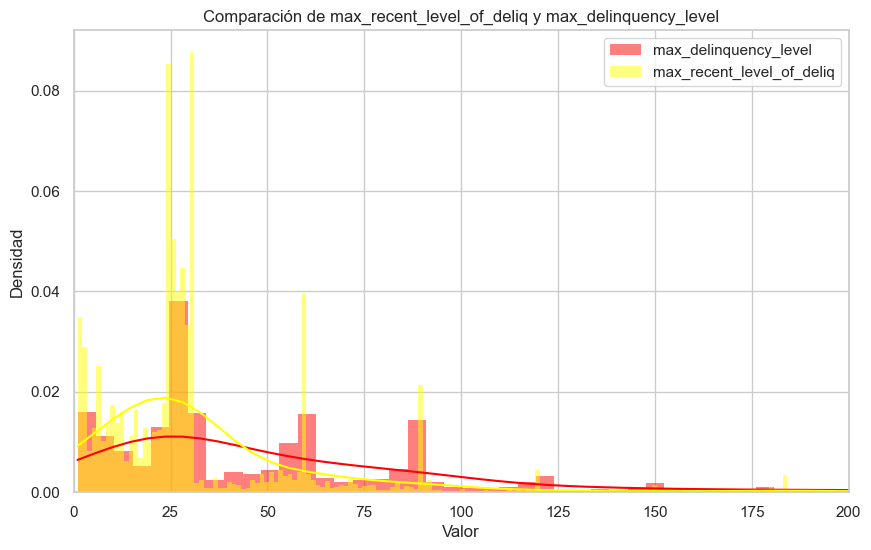

Correlación de Pearson: 0.82, P-valor: 0.0000
 La correlación es estadísticamente significativa.


In [10]:
# Filtramos datos donde 'max_delinquency_level' es mayor que 0 y no tiene valores nulos
x = external[external['max_delinquency_level'] > 0].dropna(subset=['max_delinquency_level'])

# Configuración del estilo del gráfico
sns.set(style='whitegrid')

# Definimos el tamaño de la figura
plt.figure(figsize=(10, 6))

# Limitamos el eje X
plt.xlim(right=200)

# Graficamos los histogramas con KDE (estimación de densidad)
sns.histplot(x['max_delinquency_level'], kde=True, color='red', 
             label='max_delinquency_level', stat='density', linewidth=0)

sns.histplot(x['max_recent_level_of_deliq'], kde=True, color='yellow', 
             label='max_recent_level_of_deliq', stat='density', linewidth=0)

# Añadimos leyenda y etiquetas
plt.legend()
plt.title('Comparación de max_recent_level_of_deliq y max_delinquency_level')
plt.xlabel('Valor')
plt.ylabel('Densidad')

# Mostramos la gráfica
plt.show()

# Comprobamos la correlación entre las variables con el test de Pearson
correlacion_pearson('max_recent_level_of_deliq', 'max_delinquency_level', x)

La correlación es fuerte y positiva, además el p-valor es menor de 0.5 por lo que la correlación es significativa

In [11]:
# Se elimina la variable
external = external.drop('max_delinquency_level', axis=1)

**C. time_since_first_deliquency + time_since_recent_deliquency**: Nos encontramos con una situación similar a la primera. Los valores nulos podrían representar que nunca han incurrido en un delito de mora.

In [12]:
# Iteramos sobre las variables de tiempo desde la morosidad
for col in ['time_since_first_deliquency', 'time_since_recent_deliquency']:
    # Obtenemos el máximo de 'num_times_delinquent' cuando la columna actual es nula
    max_delinquent = external.loc[external[col].isnull(), 'num_times_delinquent'].max()
    
    # Imprimimos el resultado
    print(f"Máximo de 'num_times_delinquent' cuando {col} es nulo: {max_delinquent}")

Máximo de 'num_times_delinquent' cuando time_since_first_deliquency es nulo: 0
Máximo de 'num_times_delinquent' cuando time_since_recent_deliquency es nulo: 0


Afirmamos que los valores nulos son asignados a aquellos clientes que nunca han incurrido en mora.

In [13]:
def time_classification(row):
    """
    Clasifica el valor de 'row' en una de las siguientes categorías:
    - 'Never' si el valor es NaN
    - '0-9 days' si el valor es menor a 10
    - '10-19 days' si el valor es menor a 20
    - '20+ days' si el valor es mayor o igual a 20
    """
    if pd.isna(row):
        return 'Never'
    elif row < 10:
        return '0-9 days'
    elif row < 20:
        return '10-19 days'
    return '20+ days'

Se ha tomado la decisión de categorizar las variables para evitar la pérdida de información que nos puede proporcionar para la construcción de nuestro modelo

In [14]:
# Aplicar la función a las columnas específicas
external['time_since_first_deliquency_class'] = external[
    'time_since_first_deliquency'].apply(time_classification)

external['time_since_recent_deliquency_class'] = external[
    'time_since_recent_deliquency'].apply(time_classification)

In [15]:
# Eliminamos las dos variables
external = external.drop(['time_since_first_deliquency', 'time_since_recent_deliquency'], axis=1)

**D. max_unsec_exposure_inPct**: Debido a que consta con más de un 45% de valores nulos, además de valores atípicos que están fuera del rango natural. Tampoco existe forma de comprobar si los productos de que tienen contratados los clientes tienen una exposición no Garantizada. Se toma la decisión de descartar la variable.

In [16]:
def plot_boxplot(data, title):
    """
    Representa un boxplot de los datos proporcionados, destacando la mediana, la media,
    y los valores atípicos.
    
    Parámetros:
    data: Serie o DataFrame con los datos para el boxplot.
    title: Título para el gráfico.
    """
    # Eliminar valores nulos antes de crear el boxplot
    data_clean = data.dropna()

    # Crear el boxplot
    plt.boxplot(data_clean, 
                notch=True, 
                patch_artist=True, 
                boxprops=dict(facecolor='lightblue', color='blue'), 
                whiskerprops=dict(color='blue'),
                capprops=dict(color='blue'),
                medianprops=dict(color='red'),
                showmeans=True, 
                meanprops=dict(marker='o', markerfacecolor='green', markersize=8))
    
    # Configurar título
    plt.title(title)
    
    # Mostrar el gráfico
    plt.show()

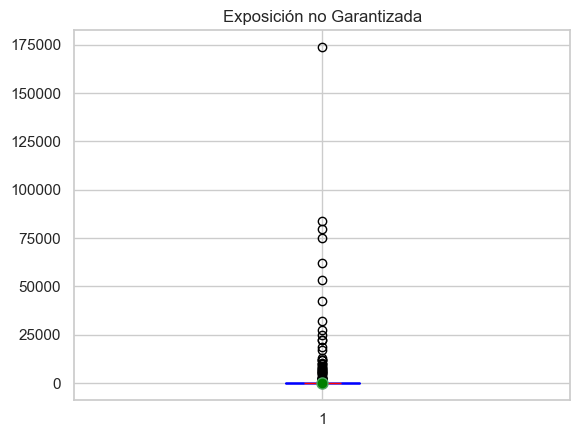

In [17]:

# Llamada a la función con los datos específicos
plot_boxplot(external['max_unsec_exposure_inPct'], 'Exposición no Garantizada')

In [18]:
# Se elimina la variable
external = external.drop(['max_unsec_exposure_inPct'], axis=1)

**E. max_deliq_6mts + max_deliq_12mts**: Procedemos a sustituir los valores nulos de las variables que recogen los niveles de máxima delincuencia por su nivel de delincuencia más reciente.

In [19]:
# Reemplaza los valores nulos en las columnas 'max_deliq_6mts' y 'max_deliq_12mts' con los valores de la columna 'max_recent_level_of_deliq'.
external.loc[
    external['max_deliq_6mts'].isnull(), 'max_deliq_6mts'] = external['max_recent_level_of_deliq']

external.loc[
    external['max_deliq_12mts'].isnull(), 'max_deliq_12mts'] = external['max_recent_level_of_deliq']

**F. time_since_recent_payment:** Se revisa que algunos tienen pagos registrados en los últimos 6 o, 12 o más meses. Se decide hacer una sustitución por los valores nulos en función de la franja de pago que tengan registrados.

In [20]:
# Revisamos las características estadísticasd de las variables
external[external['time_since_recent_payment'].isnull()].describe()

,PROSPECTID,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,PL_utilization,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,Credit_Score
count,4291.000000,0.0,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.0,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.0,4291.0,4291.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4283.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000
mean,25837.757166,NaN,0.602890,7.144955,0.051503,0.147751,0.096248,5.077138,5.935912,0.389420,0.271498,4.798648,0.980890,2.069914,0.019110,0.0,0.000699,0.022838,0.000932,0.002330,0.001864,0.0,0.0,6.379632,2.921414,0.202814,0.109472,0.143789,0.568977,0.362732,0.451956,190.088195,2.275223,1.895333,1.407344,32.634817,24669.508506,107.257283,0.735316,0.374533,0.646535,0.014469,0.041053,0.127930,0.044367,0.121656,0.042659,676.117455
std,14828.647401,NaN,2.456774,42.907087,0.355974,0.787775,0.559147,33.975548,37.277725,1.966045,1.611490,12.327864,2.280577,5.015478,0.390575,0.0,0.026435,0.612945,0.061063,0.152658,0.077828,0.0,0.0,38.157301,2.989799,0.781949,0.534456,0.629068,1.311524,1.027863,1.178211,383.387768,2.732324,2.414702,1.968817,8.931737,17072.921130,76.288717,0.412227,0.473799,0.561894,0.120597,0.183727,0.328618,0.202179,0.317305,0.196956,16.006415
min,4.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,483.000000
25%,13010.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,25.000000,16000.000000,59.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,668.000000
50%,25562.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.500000,1.000000,1.000000,1.000000,31.000000,22000.000000,87.000000,1.000000,0.000000,0.778000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,677.000000
75%,38796.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,161.000000,3.000000,2.000000,2.000000,38.000000,30000.000000,130.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,686.000000
max,51329.000000,NaN,32.000000,900.000000,5.000000,11.000000,6.000000,900.000000,900.000000,31.000000,31.000000,188.000000,28.000000,75.000000,

In [21]:
# Creamos un script para sustituir los valores nulos
x = external[external['time_since_recent_payment'].isnull()]

media_pago6 = external[external['time_since_recent_payment'] <= 180]['time_since_recent_payment'].mean()
mediana_pago12 = external[external['time_since_recent_payment'] > 180]['time_since_recent_payment'].median()

# Evitar errores con valores nulos
q6 = x['num_std_6mts']+ x['num_sub_6mts']
q12 = x['num_std_12mts']+ x['num_sub_12mts']

# Si ha realizado un pago en los últimos 6 meses, asignamos la media
external.loc[
    (external['time_since_recent_payment'].isnull()) & (q6 > 0), 
    'time_since_recent_payment'
] = round(media_pago6, 0)

# Si ha realizado un pago entre 6 y 12 meses, asignamos la mediana (para evitar outliers)
external.loc[
    (external['time_since_recent_payment'].isnull()) & (q12 > 0), 
    'time_since_recent_payment'
] = round(mediana_pago12, 0)

# Para el resto, si no se han registrado pagos, se asigna un valor basado en la distribución
# Muestreo aleatorio de los valores existentes (no nulos) de 'time_since_recent_payment'
external.loc[
    external['time_since_recent_payment'].isnull(), 
    'time_since_recent_payment'
] = np.random.choice(external['time_since_recent_payment'].dropna(), size=external['time_since_recent_payment'].isnull().sum())

**G. pct_currentBal_all_TL:** a esta variable le asignaremos la media de de sus valores evitando los valores atípicos que los manejaremos más adelante

In [22]:
# Creamos la constante
media_ins = external.loc[external['pct_currentBal_all_TL'] <= 1, 'pct_currentBal_all_TL'].mean()

# Asignamos constante a los valores nulos
external['pct_currentBal_all_TL'] = external['pct_currentBal_all_TL'].fillna(round(media_ins, 2))


**H. tot_enq, CC_enq_L6m, CC_enq, CC_enq_L12m, PL_enq, enq_L12m, PL_enq_L6m, PL_enq_L12m, time_since_recent_enq, enq_L3m, enq_L6m, time_since_recent_payment, pct_currentBal_all_TL**: Todas estas vaiables representan características de cada cliente en referencia a las consultas sobre productos financieros. Sus valores están relacionados. Sustituimos todos los valores relacionados con los productos CC y PL por el valor 0 debido a que se llega a la conclusión de que son clientes que no han realizado ninguna consulta. Se sustituye por 1 la variable **tot_enq** debido a que mínimo han realizado una consulta a los productos *others*

In [23]:
# Contamos los valores nulos por columna y los ordenamos de mayor a menor
q_nulos = external.isnull().sum()
q_nulos = q_nulos[q_nulos > 0].sort_values(ascending=False)

# Imprimimos el resultado
print(q_nulos)

tot_enq                  6321
CC_enq                   6321
CC_enq_L6m               6321
CC_enq_L12m              6321
PL_enq                   6321
PL_enq_L6m               6321
PL_enq_L12m              6321
time_since_recent_enq    6321
enq_L12m                 6321
enq_L6m                  6321
enq_L3m                  6321
dtype: int64


Confirmamos que todas las variables que representan algún aspecto relacionado con las **consultas(enq)** tienen la misma cantidad de valores nulos

In [24]:
# Verificamos que las variables en q_nulos tengan los mismos índices para los valores no nulos
for contador in range(1, 11):
    col1 = q_nulos.index[0]
    col2 = q_nulos.index[contador]
    
    # Eliminar los valores nulos de las columnas
    col1_limpia = external.dropna(subset=[col1])
    col2_limpia = external.dropna(subset=[col2])
    
    # Obtener los IDs únicos de cada columna
    ids_col1 = set(col1_limpia['PROSPECTID'])
    ids_col2 = set(col2_limpia['PROSPECTID'])
    
    # Comparar los IDs y mostrar el resultado
    if ids_col1 == ids_col2:
        print(f'Las columnas {col1} y {col2} tienen los mismos IDs después de eliminar los valores nulos.')
    else:
        print(f'Las columnas {col1} y {col2} tienen diferentes IDs después de eliminar los valores nulos.')
        print('-' * 50)

Las columnas tot_enq y CC_enq tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y CC_enq_L6m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y CC_enq_L12m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y PL_enq tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y PL_enq_L6m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y PL_enq_L12m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y time_since_recent_enq tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y enq_L12m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y enq_L6m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y enq_L3m tienen los mismos IDs después de eliminar los valores nulos.


Confirmamos que todos los valores nulos de las variables **enq** pertenecen a las mismas observaciones

In [25]:
# Filtrar filas con al menos un nulo y columnas con al menos un nulo, luego describir
external.loc[external.isnull().any(axis=1), external.isnull().any()].describe()

,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Describimos las variables objeto
external[external['tot_enq'].isnull()].describe(include='object')

,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag,time_since_first_deliquency_class,time_since_recent_deliquency_class
count,6321,6321,6321,6321,6321,6321,6321,6321
unique,2,7,2,1,1,4,4,4
top,Married,12TH,M,others,others,P2,Never,Never
freq,4857,1897,5319,6321,6321,4967,5158,5158


Observamos que las variables que representan el porcentaje de consultas tienen un **valor de 0**. Y que los últimas consultas que realizó fueron a los productos **others**.

In [27]:
# Bucle para sustituir los valores nulos de las variables enq por 0
for col in ['CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m']:
    external[col] = external[col].fillna(0)

# Sustituimos los valores nulos de 'time_since_recent_enq' asignando un valor basado en la distribución
# Muestreo aleatorio de los valores existentes (no nulos) de 'time_since_recent_enq'
external.loc[
    external['time_since_recent_enq'].isnull(), 'time_since_recent_enq'
    ] = np.random.choice(external['time_since_recent_enq'].dropna(), size=external['time_since_recent_enq'].isnull().sum())

# Como no sabemos la cantidad de consultas de los productos 'others' eliminamos las variables
external.drop(columns=['tot_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m'], inplace=True)

### 2.2. Agregación de Características

Se decidió combinar las variables *num_times_30p_dpd* y *num_times_60p_dpd* , ambas relacionadas con la mora, asignando un mayor peso a la de 60 días por su mayor gravedad. Hay que tener en cuenta que siempre que se incurrió en una mora de más de 60, previamente ya se había incurrido en la de 30. Para ello, se aplicó una ponderación que no solo refleja la importancia de cada tipo de mora, sino que también contribuye a la estandarización de los datos. La fórmula utilizada pondera los retrasos de 30 días con 0.25 y los de 60 días con 0.5, asegurando una escala homogénea. Con esto conseguimos darle más importancia a la más grave.

In [28]:
# Calcular el valor de 'num_times_dpd' como una combinación ponderada de otras columnas
external['num_times_dpd'] = round(
    external['num_times_30p_dpd'] * 0.25 + external['num_times_60p_dpd'] * 0.5, 0)

# Eliminar las columnas originales
external.drop(columns=['num_times_30p_dpd', 'num_times_60p_dpd'], inplace=True)

Vamos a realizar una agregación de variables que representan una misma característica en diferentes límites temporales utilizando un modelo PCA (Análisis de Componentes Principales). Optamos por PCA en lugar de la media ponderada debido a que existe una correlación significativa entre las variables, lo que puede introducir sesgos si se utilizan pesos arbitrarios. Además, PCA captura de manera eficiente la variabilidad temporal de los datos, lo que nos permitirá reducir la dimensionalidad sin perder la información relevante. Esto facilitará la interpretación y mejorará el rendimiento del modelo.

In [29]:
def agregacion_pca(df, n, *col):
    """
    Realiza una agregación de variables utilizando PCA, reduciendo las dimensiones
    de las columnas seleccionadas y manteniendo la variabilidad temporal.
    
    Parámetros:
    df: DataFrame de entrada con las columnas a analizar.
    n: Número de componentes principales a retener.
    *col: Columnas que se usarán para el PCA.
    
    Retorna:
    Una Serie o DataFrame con las componentes principales obtenidas.
    """
    # Comprobar que las columnas existen en el DataFrame
    for c in col:
        if c not in df.columns:
            raise ValueError(f"La columna '{c}' no está en el DataFrame.")
    
    # Selecciona y estandariza las columnas indicadas
    df_subset = df[list(col)]
    df_scaled = StandardScaler().fit_transform(df_subset)
    
    # Aplica PCA
    pca = PCA(n_components=n)
    df_pca = pca.fit_transform(df_scaled)
    
    # Si n=1, devolver una Serie con la componente principal
    if n == 1:
        return pd.Series(df_pca.flatten(), index=df.index)
    
    # Si n > 1, devolver un DataFrame con las componentes principales
    return pd.DataFrame(df_pca, index=df.index, columns=[f'PC{i+1}' for i in range(n)])

In [30]:
# Definir las nuevas columnas y sus variables correspondientes
pca_columns = {
    'num_deliq_pca': ['num_deliq_6mts', 'num_deliq_6_12mts', 'num_deliq_12mts'],
    'max_deliq_pca': ['max_deliq_6mts', 'max_deliq_12mts'],
    'num_std_pca': ['num_std', 'num_std_6mts', 'num_std_12mts'],
    'num_sub_pca': ['num_sub', 'num_sub_6mts', 'num_sub_12mts'],
    'num_dbt_pca': ['num_dbt', 'num_dbt_6mts', 'num_dbt_12mts'],
    'num_lss_pca': ['num_lss', 'num_lss_6mts', 'num_lss_12mts'],
    'CC_enq_pca': ['CC_enq', 'CC_enq_L6m', 'CC_enq_L12m'],
    'PL_enq_pca': ['PL_enq', 'PL_enq_L6m', 'PL_enq_L12m'],
    'pct_PL_enq_pca': ['pct_PL_enq_L6m_of_L12m', 'pct_PL_enq_L6m_of_ever'],
    'pct_CC_enq_pca': ['pct_CC_enq_L6m_of_L12m', 'pct_CC_enq_L6m_of_ever']
}

# Aplicar PCA para cada conjunto de variables en el diccionario
for new_col, variables in pca_columns.items():
    external[new_col] = agregacion_pca(external, 1, *variables)
    external.drop(columns=variables, inplace=True)

### 2.3. Outliers

#### 2.3.1. Descripción Outliers

In [31]:
# Creamos una variable con las variables numéricas
numeric_features = external.select_dtypes(include=[np.number]).columns
numeric_features = numeric_features.drop(['PROSPECTID', 'Credit_Score'])

In [32]:
# Diccionario para almacenar los outliers
outlier_count = {}

# Contamos los outliers por columna
for column in numeric_features:
    # Calcular el rango intercuartílico y los límites
    Q1 = external[column].quantile(0.25)
    Q3 = external[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    # Identificar outliers
    outliers = external[(external[column] < lower_bound) | (external[column] > upper_bound)]
    outlier_count[column] = outliers.shape[0]

# Mostrar el recuento de outliers
print('Recuento de outliers por feature:')
for column, count in outlier_count.items():
    if count > 0:
        print(f'{column}: {count}')

Recuento de outliers por feature:
time_since_recent_payment: 8349
num_times_delinquent: 8457
max_recent_level_of_deliq: 8495
recent_level_of_deliq: 10321
time_since_recent_enq: 5276
AGE: 582
NETMONTHLYINCOME: 3106
Time_With_Curr_Empr: 4154
pct_currentBal_all_TL: 49
CC_utilization: 3128
PL_utilization: 6723
num_times_dpd: 5381
num_deliq_pca: 8428
max_deliq_pca: 10595
num_std_pca: 7128
num_sub_pca: 654
num_dbt_pca: 170
num_lss_pca: 102
CC_enq_pca: 7835
PL_enq_pca: 3734
pct_PL_enq_pca: 11100
pct_CC_enq_pca: 3935


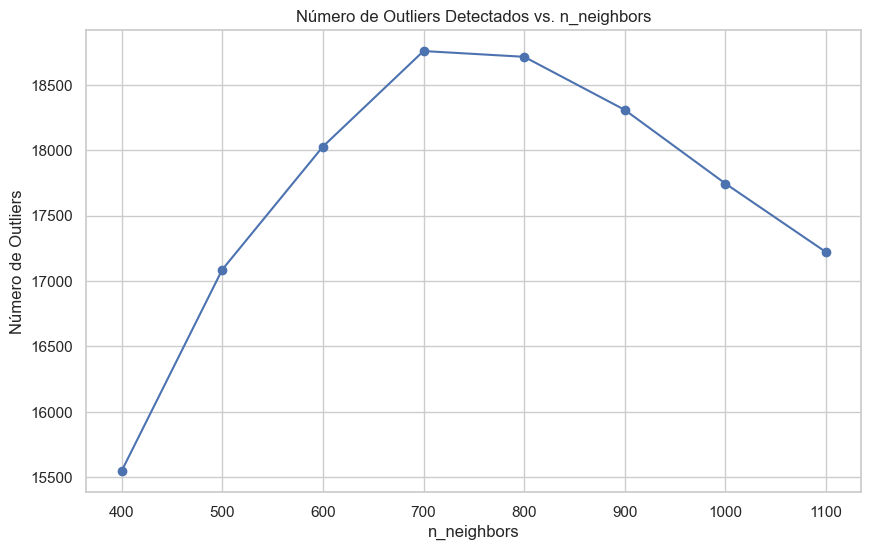

n_neighbors=400 -> Número de outliers: 15548
n_neighbors=500 -> Número de outliers: 17087
n_neighbors=600 -> Número de outliers: 18027
n_neighbors=700 -> Número de outliers: 18757
n_neighbors=800 -> Número de outliers: 18713
n_neighbors=900 -> Número de outliers: 18307
n_neighbors=1000 -> Número de outliers: 17744
n_neighbors=1100 -> Número de outliers: 17220
El valor de n_neighbors con el máximo número de outliers (18757) es: 700


,PROSPECTID,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,recent_level_of_deliq,time_since_recent_enq,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,PL_utilization,Credit_Score,num_times_dpd,num_deliq_pca,max_deliq_pca,num_std_pca,num_sub_pca,num_dbt_pca,num_lss_pca,CC_enq_pca,PL_enq_pca,pct_PL_enq_pca,pct_CC_enq_pca
count,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,1.875700e+04,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000,18757.000000
mean,25563.463347,494.538519,1.839580,21.171349,17.372927,460.599350,35.162179,2.739723e+04,125.046436,0.462258,0.212397,1.233182,0.034106,0.071503,682.944981,0.581170,-0.062378,0.143984,-0.016657,0.023511,0.039717,0.019833,-0.126980,-0.221599,-0.222156,-0.121351
std,14873.614611,673.532040,4.684901,80.520005,69.491304,668.699527,9.135519,2.848060e+04,88.577742,0.399636,0.373792,60.872652,0.543906,0.231350,20.931067,2.187369,1.543490,2.056088,1.648208,1.778094,2.185122,2.368436,1.342684,1.353815,1.207451,1.174611
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000e+00,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,489.000000,0.000000,-0.499704,-0.278640,-0.758917,-0.080266,-0.045723,-0.032404,-0.418105,-0.688347,-0.702132,-0.382010
25%,12553.000000,66.000000,0.000000,0.000000,0.000000,11.000000,28.000000,1.800000e+04,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,671.000000,0.000000,-0.499704,-0.278640,-0.758917,-0.080266,-0.045723,-0.032404,-0.418105,-0.688347,-0.702132,-0.382010
50%,25459.000000,207.000000,0.000000,0.000000,0.000000,126.000000,34.000000,2.500000e+04,103.000000,0.444000,0.000000,0.402000,0.000000,0.000000,683.000000,0.000000,-0.499704,-0.278640,-0.758917,-0.080266,-0.045723,-0.032404,-0.418105,-0.688347,-0.702132,-0.382010
75%,38457.000000,663.000000,1.000000,16.000000,11.000000,713.000000,41.000000,3.100000e+04,155.000000,1.000000,0.333000,0.861000,0.000000,0.000000,694.000000,0.000000,-0.499704,-0.278640,-0.099688,-0.080266,-0.045723,-0.032404,-0.418105,-0.434235,-0.702132,-0.382010
max,51332.000000,6065.000000,74.000000,900.000000,900.000000,4768.000000,67.000000,2.500000e+06,1020.000000,1.000000,1.000000,6327.500000,71.059000,1.708000,809.000000,40.000000,25.037598,30.987714,24.874420,132.034727,108.323028,264.262656,28.311390,35.853986,3.196516,5.929880


In [33]:
# Rango de valores para n_neighbors
neighbors_range = range(400,1101, 100)
outlier_counts = []

# Evaluar LOF para diferentes valores de n_neighbors
for n in neighbors_range:
    lof = LocalOutlierFactor(n_neighbors=n)
    y_pred = lof.fit_predict(external[numeric_features])
    outliers = np.where(y_pred == -1)[0]
    outlier_counts.append(len(outliers))

# Graficar el número de outliers detectados en función de n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, outlier_counts, marker='o', linestyle='-', color='b')
plt.title('Número de Outliers Detectados vs. n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Número de Outliers')
plt.grid(True)
plt.show()

# Crear un diccionario para almacenar los valores de n_neighbors y sus correspondientes outliers
outliers_dict = {}

# Imprimir la cantidad de outliers detectados para cada valor de n_neighbors
for n, count in zip(neighbors_range, outlier_counts):
    print(f'n_neighbors={n} -> Número de outliers: {count}')
    outliers_dict[n] = count  # Agregar el valor de n y su count al diccionario

# Encontrar el valor de n_neighbors donde el count es máximo
max_n = max(outliers_dict, key=outliers_dict.get)  # Este es el n_neighbors con el máximo count
max_count = outliers_dict[max_n]  # Este es el valor de count correspondiente

# Imprimir el resultado
print(f'El valor de n_neighbors con el máximo número de outliers ({max_count}) es: {max_n}')

# Crear el modelo LOF con el valor de n_neighbors donde count es máximo
lof = LocalOutlierFactor(n_neighbors=max_n)

# Ajustar el modelo y predecir
y_pred = lof.fit_predict(external[numeric_features])

# Obtener los índices de los outliers
outliers = np.where(y_pred == -1)[0]  # Selecciona solo la primera parte de la tupla

# Filtrar los valores atípicos en el DataFrame
outlier_values = external.iloc[outliers]

outlier_values.describe()

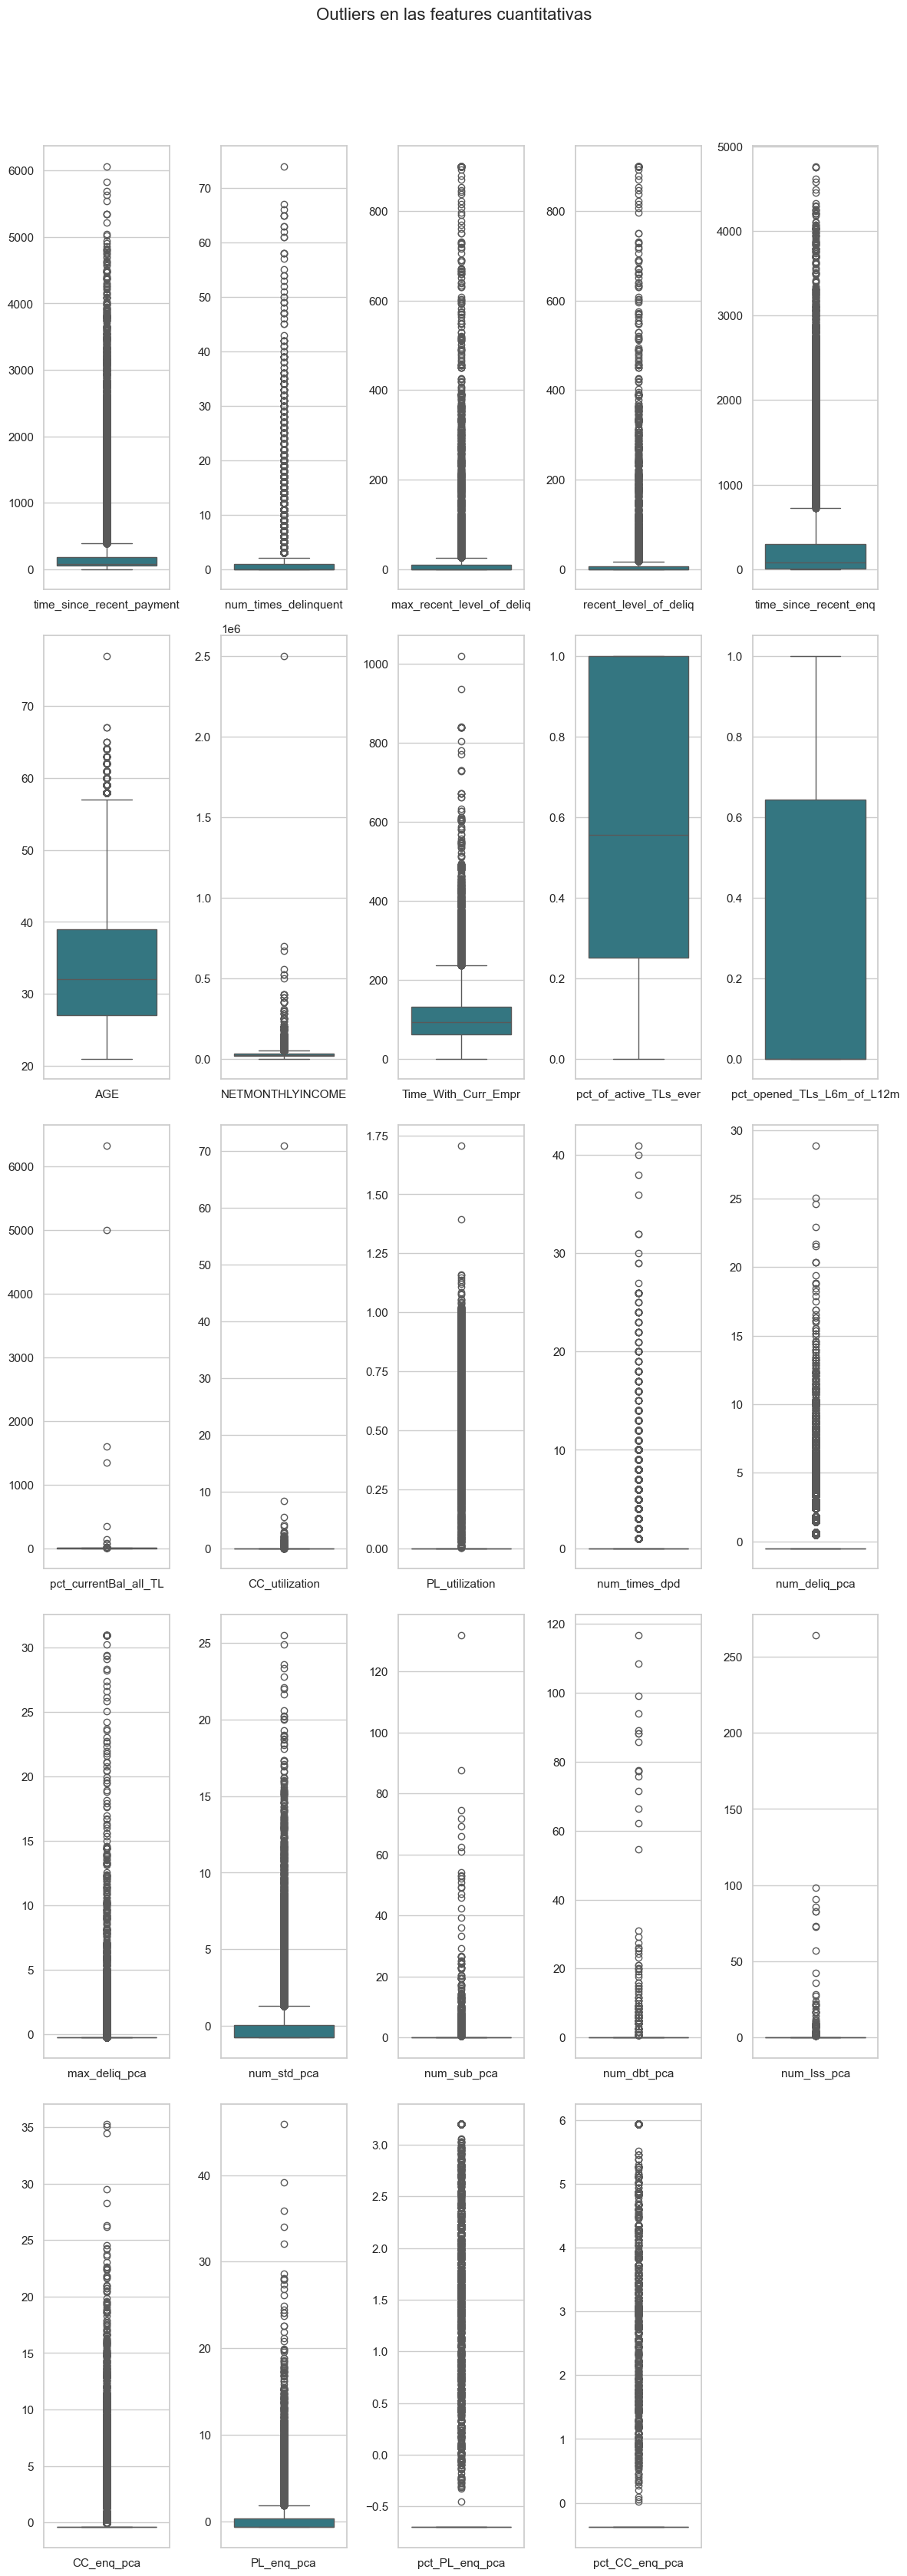

In [34]:
def plot_outliers_boxplots(df, numeric_features, palette='Set2', figsize=(12, 60)):
    """
    Dibuja boxplots para detectar outliers en las características numéricas.

    Parámetros:
    df: DataFrame que contiene los datos a visualizar.
    numeric_features: Lista de nombres de las columnas numéricas a analizar.
    palette: Paleta de colores para los gráficos (por defecto 'Set2').
    figsize: Tamaño de la figura para los subgráficos (por defecto (12, 60)).
    """
    # Configuración de estilo
    sns.set_palette(palette)

    color_viridis = sns.color_palette('viridis')[2]
    plt.figure(figsize=figsize)

    # Dibujar un boxplot por cada columna numérica
    for i, column in enumerate(numeric_features):
        plt.subplot(5, 5, i + 1)
        sns.boxplot(data=df[[column]], color=color_viridis) 

    # Mostrar título y ajustar el layout
    plt.suptitle('Outliers en las features cuantitativas', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Llamada a la función
plot_outliers_boxplots(external, numeric_features)

Hay una alta proporción de outliers por lo que procedemos con su tratamiento para intentar reducirlos.

#### 2.3.2. Imputación de Outliers

Las variables **pct_currentBal_all_TL, CC_utilization y PL_utilization** deberían estar en un rango de 0 a 1 debido a que son porcentajes. Dicho esto, se procede a asignar el valor a la alta para tales valores atípicos.

In [35]:
# Lista de columnas a procesar
pct_cols = ['pct_currentBal_all_TL', 'CC_utilization', 'PL_utilization']

# Procesamos las columnas para capear los valores mayores a 1
for column in pct_cols:
    # Creamos una máscara y asignamos el valor máximo (1)
    external.loc[external[column] > 1, column] = 1

La variable **Time_With_Curr_Empr** está representada en meses. Por lo que es imposible que haya valores tan altos para edades tan bajas, lo que me hace llegar a la conclusión que esos valores están en días en vez de en meses. Realizaremos una operación con vectores y su correspondiente mascara para realizar un proceso de filtrado y reasignación de valores. Todos aquellos que tengan una cantidad de tiempo en su actual empleo superior a su tiempo activo se le imputará el valor que tienen formateado en meses.

In [36]:
def plot_age_employment_relation(df, age_column, employment_time_column, title='Relación entre Edad y Tiempo con el Empleador Actual'):
    """
    Representa la relación entre la edad y el tiempo que llevan en el empleo actual.
    
    Parámetros:
    df: DataFrame que contiene los datos.
    age_column: Nombre de la columna de edad.
    employment_time_column: Nombre de la columna de tiempo con el empleador actual.
    title: Título del gráfico (opcional).
    """
    # Crear gráfico de dispersión
    plt.figure(figsize=(10, 6))
    plt.scatter(data=df, x=age_column, y=employment_time_column, alpha=0.7, c='blue', edgecolors='k')
    
    # Configurar título y etiquetas
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Edad (Años)', fontsize=12)
    plt.ylabel('Tiempo con el Empleador Actual (Meses)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    
    # Mostrar gráfico
    plt.show()

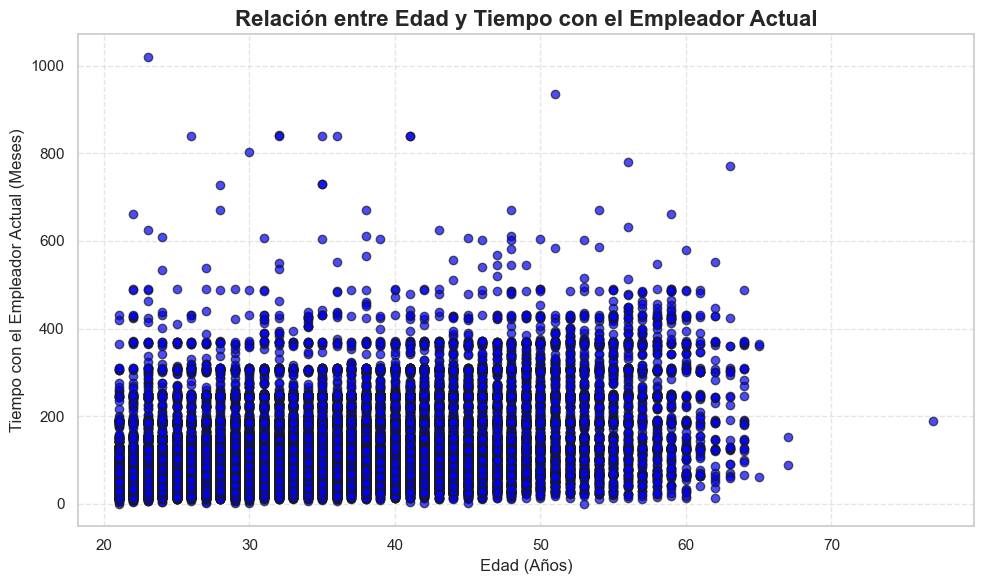

In [37]:
# Llamada a la función
plot_age_employment_relation(external, 'AGE', 'Time_With_Curr_Empr')

In [38]:
# Para calcular el tiempo activo
TIME_ACTIVE = external['AGE'] - 10
CURR_EMPL_YEAR = external['Time_With_Curr_Empr'] / 12

# Crear una máscara para las filas donde la condición se cumple
mask = CURR_EMPL_YEAR > TIME_ACTIVE

# Actualizar las filas específicas de forma vectorizada y redondear a 0 decimales
external.loc[mask, 'Time_With_Curr_Empr'] = (external.loc[mask, 'Time_With_Curr_Empr'] / 12).round(0).astype(int)

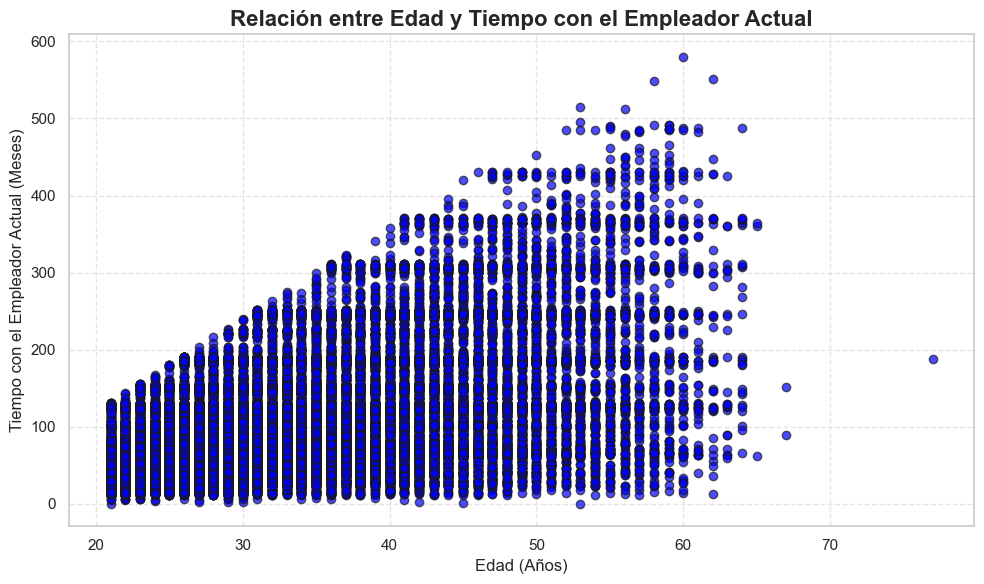

In [39]:
# Volvemos a representar para ver el cambio lógico de la representación
plot_age_employment_relation(external, 'AGE', 'Time_With_Curr_Empr')

#### 2.3.3. Transformación de las distribuciones

Para transformar las distribuciones de las variables, adoptaremos la siguiente estrategia. Inicialmente, identificaremos aquellas variables con una asimetría positiva significativa, definida por un umbral de asimetría mayor a 1,5. Para estas variables, aplicaremos una transformación logarítmica. Esta técnica comprime la escala de los valores grandes, reduce la cola derecha de la distribución y suaviza las variaciones extremas, mejorando la normalidad de las variables y su adecuación para modelos predictivos que asumen distribuciones simétricas.

Posteriormente, el resto de las variables serán transformadas mediante el método Yeo-Johnson. Esta técnica ajusta la forma de la distribución a una más normal, optimizando la precisión de los modelos estadísticos y la eficacia del análisis predictivo.

Finalmente, estas transformaciones combinadas preparan el conjunto de datos para análisis avanzados con mejores resultados. Adicionalmente, se decide escalar todas las variables en un rango idéntico de 0 a 1 utilizando MinMaxScaler para asegurar la comparabilidad entre las diferentes escalas. En el caso de la variable objetivo 'Credit_Score' se decide solo aplicarle la última transformación para que se más fácil su reconversión al realizar las predicciones.

In [40]:
# Inicializar listas para variables transformadas
log_transformed = []
yeo_johnson_transformed = []

# Iterar sobre las características numéricas
for col in numeric_features:
    series = external[col]
    
    # Si la asimetría es mayor que 1.5, aplicar transformación logarítmica
    if skew(series) > 1.5:
        external[col] = np.log1p(series)
        log_transformed.append(col)
    
    # Si es un flotante, aplicar transformación Box-Cox
    else:
        yeo_johnson = PowerTransformer(method='yeo-johnson')
        external[col] = yeo_johnson.fit_transform(series.values.reshape(-1, 1)).flatten()
        yeo_johnson_transformed.append(col)

# Imprimir las listas de variables transformadas
print(f'Variables transformadas con logaritmo: {log_transformed}')
print(f'Variables transformadas con Yeo-Johnson: {yeo_johnson_transformed}')

Variables transformadas con logaritmo: ['time_since_recent_payment', 'num_times_delinquent', 'max_recent_level_of_deliq', 'recent_level_of_deliq', 'time_since_recent_enq', 'NETMONTHLYINCOME', 'CC_utilization', 'PL_utilization', 'num_times_dpd', 'num_deliq_pca', 'max_deliq_pca', 'num_std_pca', 'num_sub_pca', 'num_dbt_pca', 'num_lss_pca', 'CC_enq_pca', 'PL_enq_pca', 'pct_PL_enq_pca', 'pct_CC_enq_pca']
Variables transformadas con Yeo-Johnson: ['AGE', 'Time_With_Curr_Empr', 'pct_of_active_TLs_ever', 'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL']


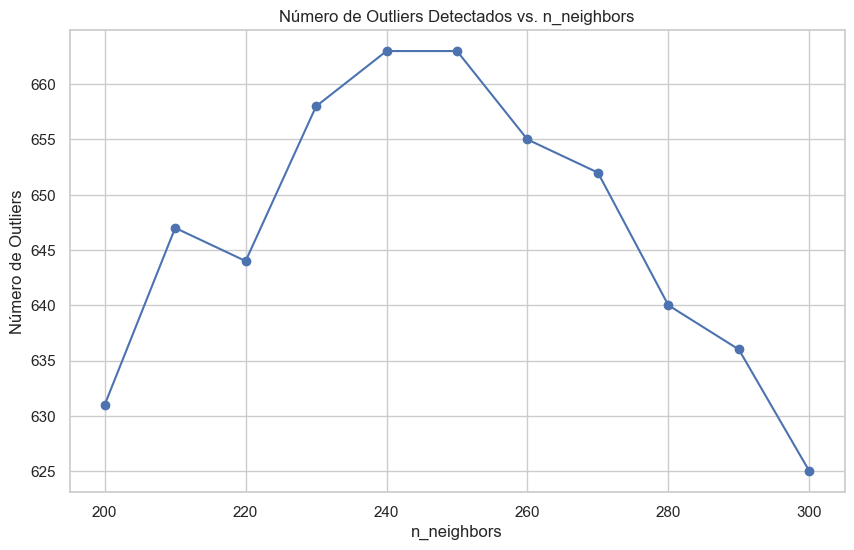

n_neighbors=200 -> Número de outliers: 631
n_neighbors=210 -> Número de outliers: 647
n_neighbors=220 -> Número de outliers: 644
n_neighbors=230 -> Número de outliers: 658
n_neighbors=240 -> Número de outliers: 663
n_neighbors=250 -> Número de outliers: 663
n_neighbors=260 -> Número de outliers: 655
n_neighbors=270 -> Número de outliers: 652
n_neighbors=280 -> Número de outliers: 640
n_neighbors=290 -> Número de outliers: 636
n_neighbors=300 -> Número de outliers: 625
El valor de n_neighbors con el máximo número de outliers (663) es: 240


In [41]:
# Rango de valores para n_neighbors
neighbors_range = range(200, 301, 10)
outlier_counts = []

# Evaluar LOF para diferentes valores de n_neighbors
for n in neighbors_range:
    lof = LocalOutlierFactor(n_neighbors=n)
    y_pred = lof.fit_predict(external[numeric_features])
    outliers = np.where(y_pred == -1)[0]
    outlier_counts.append(len(outliers))

# Graficar el número de outliers detectados en función de n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, outlier_counts, marker='o', linestyle='-', color='b')
plt.title('Número de Outliers Detectados vs. n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Número de Outliers')
plt.grid(True)
plt.show()

# Crear un diccionario para almacenar los valores de n_neighbors y sus correspondientes outliers
outliers_dict = {}

# Imprimir la cantidad de outliers detectados para cada valor de n_neighbors
for n, count in zip(neighbors_range, outlier_counts):
    print(f'n_neighbors={n} -> Número de outliers: {count}')
    outliers_dict[n] = count  # Agregar el valor de n y su count al diccionario

# Encontrar el valor de n_neighbors donde el count es máximo
max_n = max(outliers_dict, key=outliers_dict.get)
max_count = outliers_dict[max_n] 

# Imprimir el resultado
print(f'El valor de n_neighbors con el máximo número de outliers ({max_count}) es: {max_n}')

# Crear el modelo LOF con el valor de n_neighbors donde count es máximo
lof = LocalOutlierFactor(n_neighbors=max_n)

# Ajustar el modelo y predecir
y_pred = lof.fit_predict(external[numeric_features])

# Obtener los índices de los outliers
outliers = np.where(y_pred == -1)[0]

# Filtrar los valores atípicos en el DataFrame
outlier_values = external.iloc[outliers]

Estas técnicas han mejorado la simetría de las distribuciones, reducido la influencia de outliers y unificado las escalas, lo que debería contribuir a un mejor rendimiento de los modelos predictivos.

In [ ]:
# Aplicamos normalización excalando los datos en un rango de 0 a 1
scaler = MinMaxScaler()
external[numeric_features] = scaler.fit_transform(external[numeric_features])
external['Credit_Score'] = scaler.fit_transform(external[['Credit_Score']])

## 3. Análisis Univariante

### 3.1. Variables categóricas

In [43]:
# Obtener las columnas categóricas (booleanas y de tipo objeto) del DataFrame
cat_features = external.select_dtypes(include=['bool', 'object']).columns.tolist()

In [44]:
def Count_Cat(df, cat_feat):
    # Verificación inicial
    if cat_feat not in df.columns:
        raise ValueError(f"La columna '{cat_feat}' no existe en el DataFrame.")

    # Valores únicos
    unique_values = df[cat_feat].nunique()
    
    # Encabezado
    print('\n\n')
    formatted_text = f'**{cat_feat.upper()}**'
    try:
        display(Markdown(formatted_text)) 
    except:
        print(formatted_text)
    
    print(f"El número de categorías distintas en la variable '{cat_feat}' es {unique_values}.")

    # Datos
    feat_count = df[cat_feat].value_counts()
    feat_perc = (feat_count / len(df)) * 100
    feat_res = pd.DataFrame({'Recuento': feat_count, '%': round(feat_perc, 2)})\
               .sort_values(by='Recuento', ascending=False).head(30)

    # Configuración de estilo
    sns.set(style='whitegrid')
    fig = plt.figure(figsize=(18, 10))
    spec = gridspec.GridSpec(1, 2, width_ratios=[1.5, 1])

    # Gráfico de barras
    ax0 = plt.subplot(spec[0])
    sns.barplot(y='%', x=feat_res.index, data=feat_res, palette='viridis', ax=ax0, hue=feat_res.index)

    ax0.set_title(f"Porcentaje de instancias por {cat_feat}", fontsize=14)
    ax0.set_ylabel('% de instancias', fontsize=14)
    ax0.set_xlabel(cat_feat, fontsize=14)

    # Configurar correctamente los ticks antes de asignar etiquetas
    ax0.set_xticks(range(len(feat_res.index)))  # Fijar los ticks en función de la cantidad de categorías
    ax0.set_xticklabels(feat_res.index, rotation=45, ha='right')

    # Tabla
    ax1 = plt.subplot(spec[1])
    ax1.axis('off')
    cell_text = feat_res.reset_index().values.tolist()
    col_labels = ['Categoría', 'Recuento', '%']
    table = ax1.table(cellText=cell_text, colLabels=col_labels, loc='center', cellLoc='center', colColours=['#f0f0f0'] * 3)
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)

    # Mostrar visualización
    plt.tight_layout()
    plt.show()


In [ ]:
# Itera las variables categóricas para aplicar la función
for v_cat in cat_features:
        Count_Cat(external, v_cat)

1.	MARITALSTATUS: La muestra revela un fuerte sesgo hacia personas casadas, representando el 73.54% de las instancias.

2.	EDUCATION: Los niveles educativos "GRADUATE" y "12TH" concentran la mayoría de las instancias, sugiriendo la importancia de la educación en el análisis.

3.	GENDER: El género masculino predomina abrumadoramente en la muestra, alcanzando el 88.14% de las instancias.

4.	CC_Flag: La gran mayoría de las instancias (91.05%) no tienen tarjeta de crédito activada ("False").

5.	PL_Flag: Un alto porcentaje de instancias (83.21%) no tienen la préstamo personal activado ("False").

6.	HL_Flag: La mayoría de las instancias (72.89%) no tienen hipoteca activa ("False").


7.	GL_Flag: Un porcentaje muy alto de instancias (94.71%) no tienen préstamo basado en oro activado ("False").

8.	last_prod_enq2: Las consultas sobre "otros" productos y "ConsumerLoan" representan el 75.24% del total, destacando el interés en estos productos.

9.	first_prod_enq2: La categoría "otros" productos lidera las primeras consultas de los usuarios, abarcando el 54.78% de las instancias.

10.	Approved_Flag: Las solicitudes en la categoría "P2" son las más comunes (62.72%), sugiriendo una mayor probabilidad de aprobación.

11.	time_since_first_deliquency_class: La mayoría de las instancias (70.03%) nunca han tenido una morosidad, indicando un bajo riesgo general.

12.	time_since_recent_deliquency_class: Al igual que con la primera morosidad, la mayoría de las instancias (70.03%) no han tenido una morosidad reciente.

### 3.2. Variables cuantitativas

In [1]:
def Count_Quant(df, quant_feat):
    # Encabezado
    print()
    print()
    formatted_text = f'**{quant_feat.upper()}**'
    try:
        display(Markdown(formatted_text))
    except:
        print(formatted_text)

    # Estadísticos descriptivos
    print('Estadísticos')
    print()
    print(f'Mínimo: {round(df[quant_feat].min(),2)}')
    print(f'Máximo: {round(df[quant_feat].max(),2)}')
    print(f'Promedio: {round(df[quant_feat].mean(), 2)}')
    print(f'Std.dev: {round(df[quant_feat].std(),2)}')
    print()
    print(f'Histograma y Boxplot de {quant_feat}.')      

    # Configuración de estilo
    color = '#EE9414'
    sns.set(style='whitegrid')
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 7))

    # Histograma con KDE corregido
    sns.histplot(data=df, x=quant_feat, ax=axes[0], kde=True, color=color, kde_kws={'bw_adjust': 0.3, 'clip': (0, 1)})
    axes[0].set_xlabel('')
    axes[0].set_xlim(0, 1)  # Limitar eje X

    # Boxplot
    sns.boxplot(data=df, x=quant_feat, ax=axes[1], color=color)
    axes[1].set_xlabel('')
    axes[1].set_xlim(0, 1)  # Limitar eje X

    # Mostrar gráficos
    plt.tight_layout()
    plt.show()


In [2]:
# Itera sobre las varáibles numericas para aplicar la función
for v_num in numeric_features:
    Count_Quant(external, v_num)

NameError: name 'numeric_features' is not defined

**Grupo 1: Distribuciones Sesgadas a la Izquierda con Alta Concentración en 0**
NUM_TIMES_DELINQUENT
MAX_RECENT_LEVEL_OF_DELIQ
RECENT_LEVEL_OF_DELIQ
NUM_TIMES_DPD
NUM_DELIQ_PCA
MAX_DELIQ_PCA
NUM_STD_PCA
NUM_SUB_PCA
NUM_DBT_PCA
NUM_LSS_PCA
CC_ENQ_PCA
PL_ENQ_PCA
CC_UTILIZATION
PL_UTILIZATION

Insight General: La gran mayoría de los clientes no ha experimentado eventos negativos (retrasos, morosidad, consultas) o no tiene acceso a ciertos tipos de crédito (estandarizado, subordinado, deuda). Un pequeño porcentaje de clientes sí experimenta estos eventos o tiene acceso a estos créditos, lo que requiere investigación y estrategias específicas.

**Grupo 2: Distribuciones Sesgadas a la Derecha con Alta Concentración en Valores Altos**
TIME_SINCE_RECENT_PAYMENT
NETMONTHLYINCOME
TIME_WITH_CURR_EMPR

Insight General: La mayoría de los clientes tiene un comportamiento positivo (pagos regulares, ingresos altos, antigüedad laboral alta). Sin embargo, existen algunos valores atípicos con comportamientos menos favorables, lo que podría ser un área de oportunidad para investigar y apoyar a estos clientes.

**Grupo 3: Distribuciones Multimodales Complejas**
PCT_OF_ACTIVE_TLS_EVER
PCT_OPENED_TLS_L6M_OF_L12M
PCT_CURRENTBAL_ALL_TL
PCT_PL_ENQ_PCA
PCT_CC_ENQ_PCA

Insight General: Se observa una gran heterogeneidad en el comportamiento de los clientes con respecto al uso de sus líneas de crédito y las consultas realizadas. Esto sugiere la existencia de diferentes segmentos de clientes con necesidades y comportamientos diversos, lo que requiere estrategias específicas para cada grupo.

**Grupo 4: Distribución Bimodal con Dos Picos Claros**
TIME_SINCE_RECENT_ENQ

Insight: Se observan dos grupos de clientes diferenciados según el tiempo transcurrido desde su última consulta. Esto sugiere diferentes segmentos de clientes con comportamientos distintos que requieren estrategias específicas.

## 4. Análisis Bivariante

### 4.1. Estudio de las correlaciones

#### 4.1.1. Variables Categóricas

In [ ]:
def cramers_v(contingency_table):
    '''
    Calcula Cramér's V para una tabla de contingencia.
    
    Args:
        contingency_table (pd.DataFrame): Tabla de contingencia entre dos variables.
    
    Returns:
        float: Valor de Cramér's V entre 0 y 1.
    '''
    # Valor de chi-cuadrado
    chi2 = chi2_contingency(contingency_table)[0]
    
    # Total de observaciones
    n = contingency_table.sum().sum()
    
    # Número de categorías en cada variable
    k, r = contingency_table.shape
    
    # Fórmula de Cramér's V
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

def cramers_v_relationships(df, cat_features):
    '''
    Evalúa la fuerza de la relación entre todas las variables categóricas de un dataset usando Cramér's V.
    
    Args:
        df (pd.DataFrame): Dataset con las variables categóricas.
        cat_features (list): Lista de nombres de columnas categóricas en el dataset.
    
    Returns:
        pd.DataFrame: DataFrame con las combinaciones de variables y sus valores de Cramér's V.
    '''
    results = []
    
    # Recorre todas las combinaciones de variables categóricas
    for var1, var2 in combinations(cat_features, 2):
        
        # Genera la tabla de contingencia
        contingency_table = pd.crosstab(df[var1], df[var2])
        
        # Calcula Cramér's V
        cramers_value = cramers_v(contingency_table)
        
        # Almacena los resultados
        results.append({
            'Variable 1': var1,
            'Variable 2': var2,
            'Cramérs V': cramers_value
        })
    
    # Devuelve los resultados como un DataFrame
    return pd.DataFrame(results)

In [ ]:
# Obtener las relaciones entre variables categóricas utilizando Cramér's V
resultados_cramers_v = cramers_v_relationships(external, cat_features)

# Filtrar y mostrar las relaciones con Cramér's V >= 0.3, ordenadas de mayor a menor
print(resultados_cramers_v[
    resultados_cramers_v['Cramérs V'] >= 0.3].sort_values(by=['Cramérs V'], ascending=False))


                           Variable 1                          Variable 2  \
65  time_since_first_deliquency_class  time_since_recent_deliquency_class   
52                            GL_Flag                     first_prod_enq2   
34                            CC_Flag                     first_prod_enq2   
33                            CC_Flag                      last_prod_enq2   
56                     last_prod_enq2                     first_prod_enq2   
51                            GL_Flag                      last_prod_enq2   

    Cramérs V  
65   0.725807  
52   0.442448  
34   0.436742  
33   0.376139  
56   0.339100  
51   0.315898  


Tras esta prueba estadística llegamos a la conclusión de que eliminaremos las variables **first_prod_enq2** y **time_since_first_deliquency_class**, debido a:

    - La interpretación de la prueba de Cramér especifíca que la relación deja de ser moderada cuando los resultados mayores son que 0.4.
    - Las variables que recogen el tiempo desde que se ha incurrido en mora representan una elevada correlación. Procedemos a eliminar la variable **time_since_first_deliquency_class**
    - Disponemos tambien de una variable que expresa carácterísticas similares y con la que tambien comparte una relación significativa, **last_prod_enq2** 

In [ ]:
# Eliminamos las columnas del DataFrame
external.drop(columns=['time_since_first_deliquency_class', 'first_prod_enq2'], inplace=True)

#### 4.1.2. Variables Numéricas

Para el análisis de las correlaciones, emplearemos dos métodos distintos. En primer lugar, utilizaremos la correlación de Pearson, que nos permitirá identificar las relaciones lineales entre las variables. Posteriormente, recurriremos al método de Spearman, el cual es más adecuado para detectar relaciones no lineales. Con el fin de controlar las posibles multicolinealidades, aplicaremos un filtro moderado, estableciendo un umbral de 0.85, para evitar la presencia de correlaciones excesivas que puedan distorsionar los resultados del modelo.

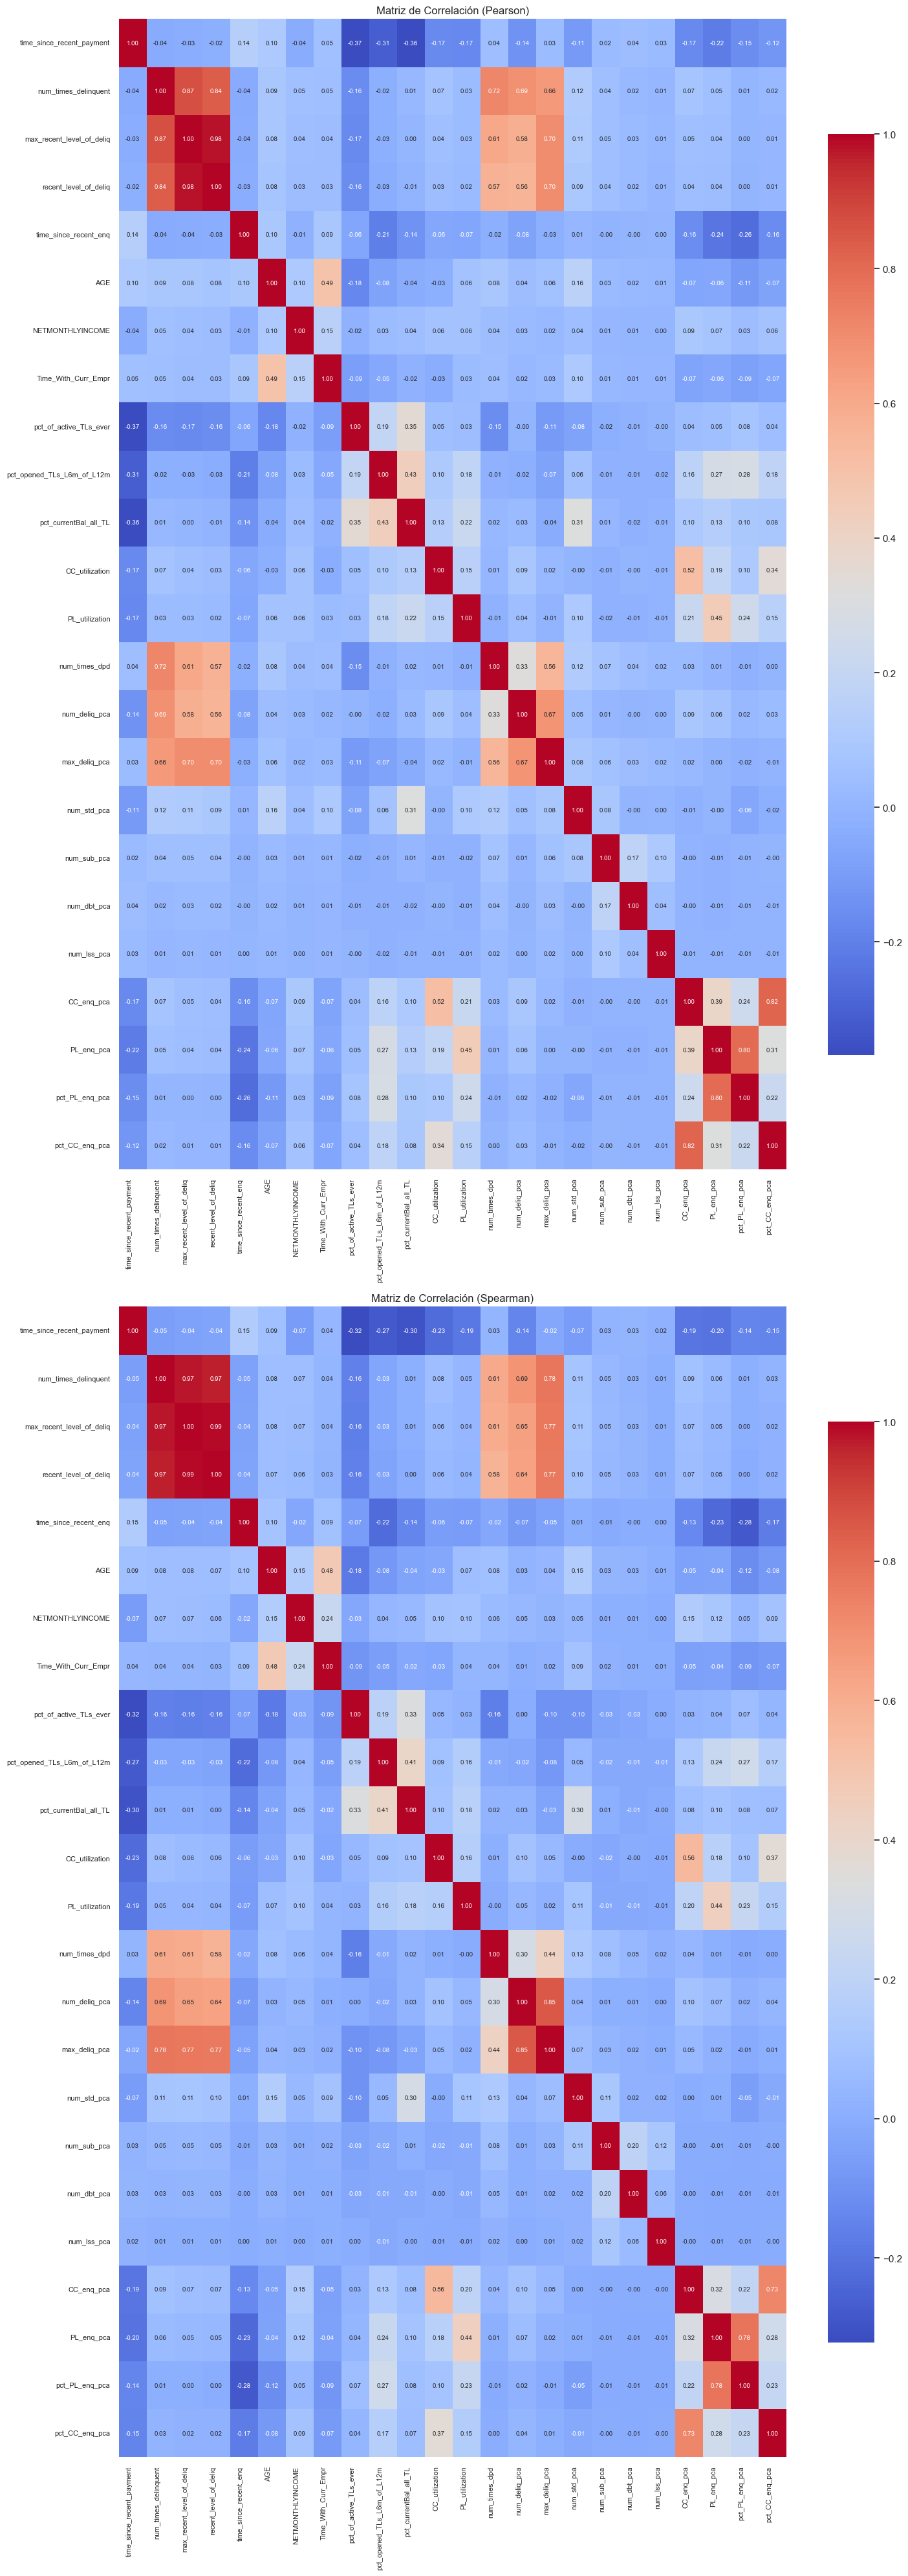

In [ ]:
# Lista de métodos de correlación
methods = ['pearson', 'spearman']

# Configuración de la figura: 3 filas, 1 columna
fig, axes = plt.subplots(2, 1, figsize=(15, 40), sharey=True)

# Iterar sobre los métodos y generar las matrices de correlación
for i, method in enumerate(methods):
    # Calcular la matriz de correlación
    correlation_matrix = external[numeric_features].corr(method=method)
    
    # Crear el heatmap
    sns.heatmap(
        correlation_matrix, 
        annot=True, 
        cmap='coolwarm', 
        fmt='.2f', 
        ax=axes[i], 
        annot_kws={'size': 7}, 
        cbar_kws={'shrink': 0.8} 
    )
    
    # Personalizar etiquetas de los ejes
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=8)
    axes[i].set_yticklabels(axes[i].get_yticklabels(), rotation=0, fontsize=8)
    axes[i].set_title(f'Matriz de Correlación ({method.capitalize()})', fontsize=12)

# Ajustar el diseño general de la figura
plt.tight_layout()

# Mostrar la figura
plt.show()

In [ ]:
# Definir el umbral de correlación y lista de métodos
threshold = 0.79
methods = ['pearson', 'spearman']

# Crear una máscara de correlaciones combinadas
correlation_matrix = np.zeros((len(numeric_features), len(numeric_features)))

for met in methods:
    corr_mat = external[numeric_features].corr(method=met).abs()
    correlation_matrix = np.maximum(correlation_matrix, corr_mat)

# Crear DataFrame de la matriz combinada
correlation_df = pd.DataFrame(correlation_matrix, index=numeric_features, columns=numeric_features)

# Identificar y eliminar columnas con alta correlación
columns_to_drop = set()
while True:
    # Encontrar la variable con más correlaciones altas
    high_corr = (correlation_df > threshold) & (correlation_df != 1.0)
    high_corr_sum = high_corr.sum().sort_values(ascending=False)

    if high_corr_sum.max() == 0:
        break

    # Eliminar la variable más problemática (con más correlaciones altas)
    col_to_remove = high_corr_sum.idxmax()
    columns_to_drop.add(col_to_remove)
    
    # Eliminar la columna y fila de la matriz de correlación
    correlation_df.drop(index=col_to_remove, columns=col_to_remove, inplace=True)

print(f'Tamaño original: {external.shape}')
print(f'Columnas a eliminar: {columns_to_drop}')

# Eliminar columnas en el DataFrame
external = external.drop(columns=columns_to_drop)

print(f'Tamaño después de filtrar: {external.shape}')

Tamaño original: (51336, 36)
Columnas a eliminar: {'pct_CC_enq_pca', 'num_times_delinquent', 'max_recent_level_of_deliq', 'num_deliq_pca', 'PL_enq_pca'}
Tamaño después de filtrar: (51336, 31)


### 4.2. Target VS Variables Categóricas

In [ ]:
# Volvemos a definir la variable con las columnas categóricas
cat_features = external.select_dtypes(include=['bool', 'object']).columns.to_list()

In [ ]:
def Analyze_Categorical_Features_Density(df, cat_feat, target_column):
    '''
    Genera diagramas de densidad superpuestos para cada variable categórica,
    mostrando las distribuciones para cada valor distinto en la misma visualización.
    '''

    print(f"\nAnálisis de variables categóricas respecto a la columna objetivo '{target_column}':\n")

    for v in cat_feat:
        if v == target_column:
            continue

        print(f"\nVariable categórica: {v}")
        print(f"Número de categorías únicas: {df[v].nunique()}")
        print(f"Frecuencia de las categorías principales:\n{df[v].value_counts().head()}\n")

        plt.figure(figsize=(12, 8))  # Ajustar tamaño para mejor visualización

        for valor in df[v].unique():
            subset = df[df[v] == valor]
            sns.kdeplot(subset[target_column], label=str(valor), fill=True)  # Añadir etiqueta y rellenar

        plt.title(f"Distribución de {target_column} para diferentes valores de {v}")
        plt.xlabel(target_column)
        plt.ylabel("Densidad")
        plt.legend()  # Mostrar leyenda para identificar los grupos
        plt.show()


Análisis de variables categóricas respecto a la columna objetivo 'Credit_Score':


Variable categórica: MARITALSTATUS
Número de categorías únicas: 2
Frecuencia de las categorías principales:
MARITALSTATUS
Married    37752
Single     13584
Name: count, dtype: int64



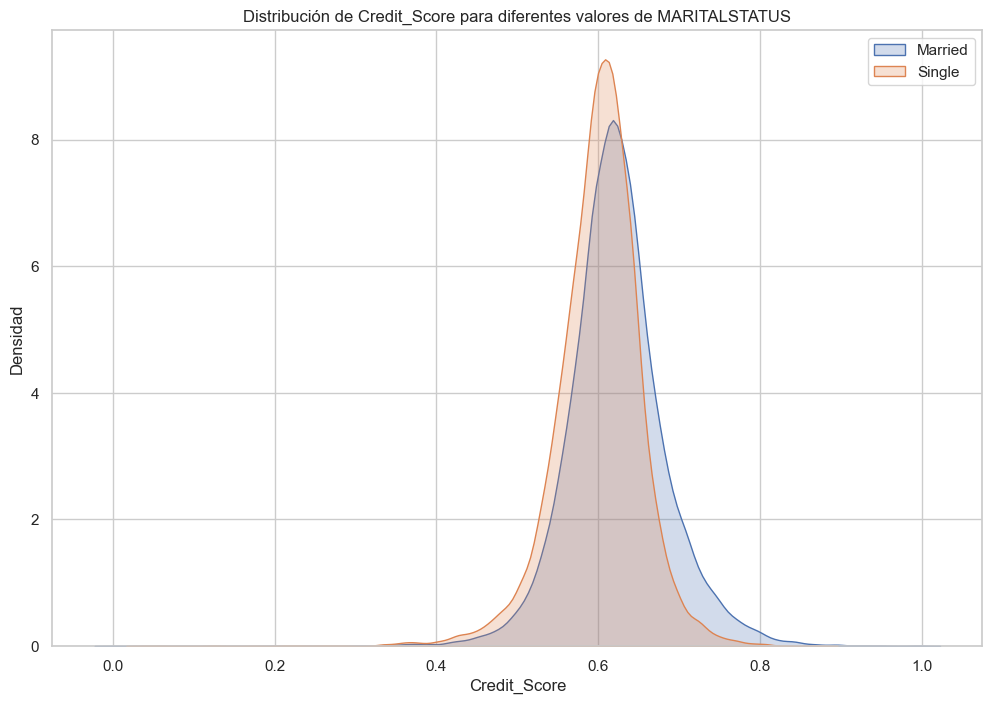


Variable categórica: EDUCATION
Número de categorías únicas: 7
Frecuencia de las categorías principales:
EDUCATION
GRADUATE          16673
12TH              14467
SSC                9276
UNDER GRADUATE     5492
OTHERS             2917
Name: count, dtype: int64



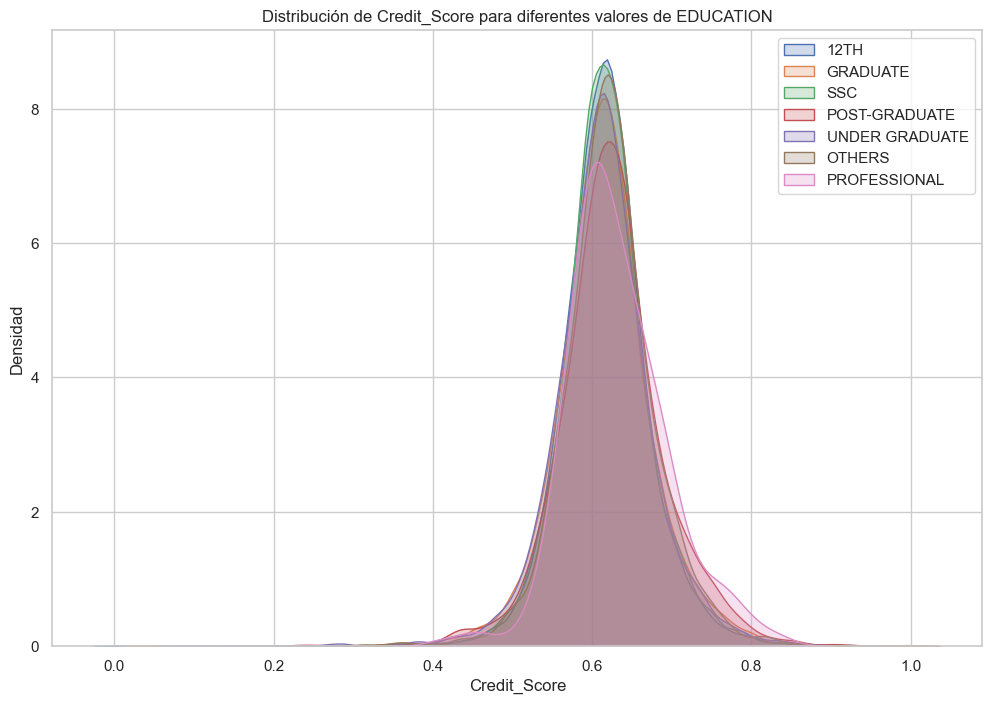


Variable categórica: GENDER
Número de categorías únicas: 2
Frecuencia de las categorías principales:
GENDER
M    45245
F     6091
Name: count, dtype: int64



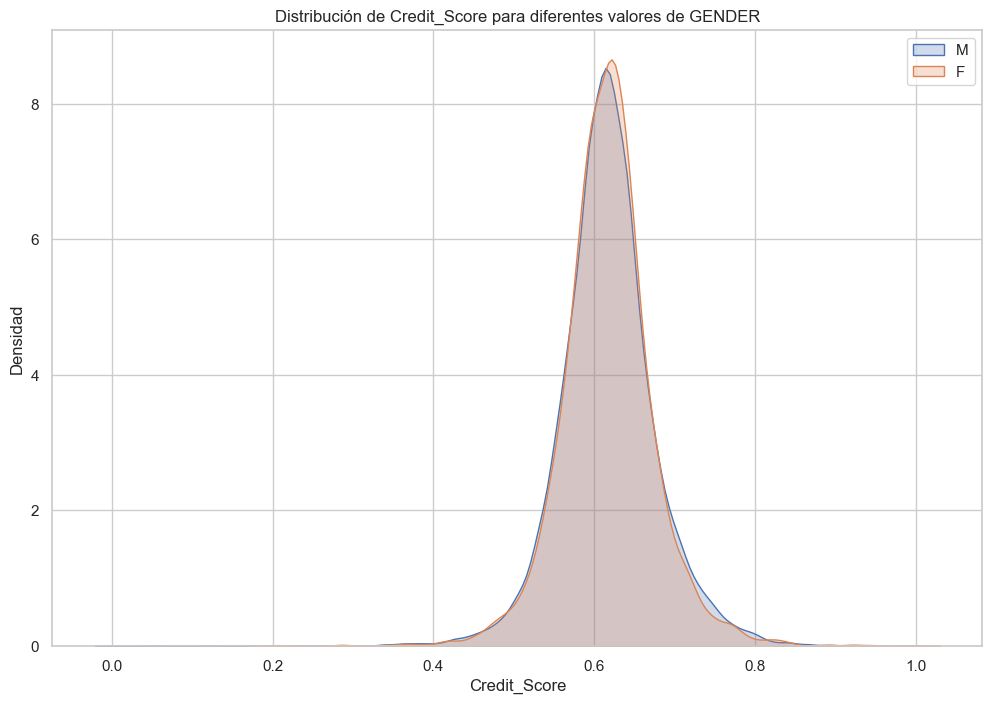


Variable categórica: CC_Flag
Número de categorías únicas: 2
Frecuencia de las categorías principales:
CC_Flag
False    46743
True      4593
Name: count, dtype: int64



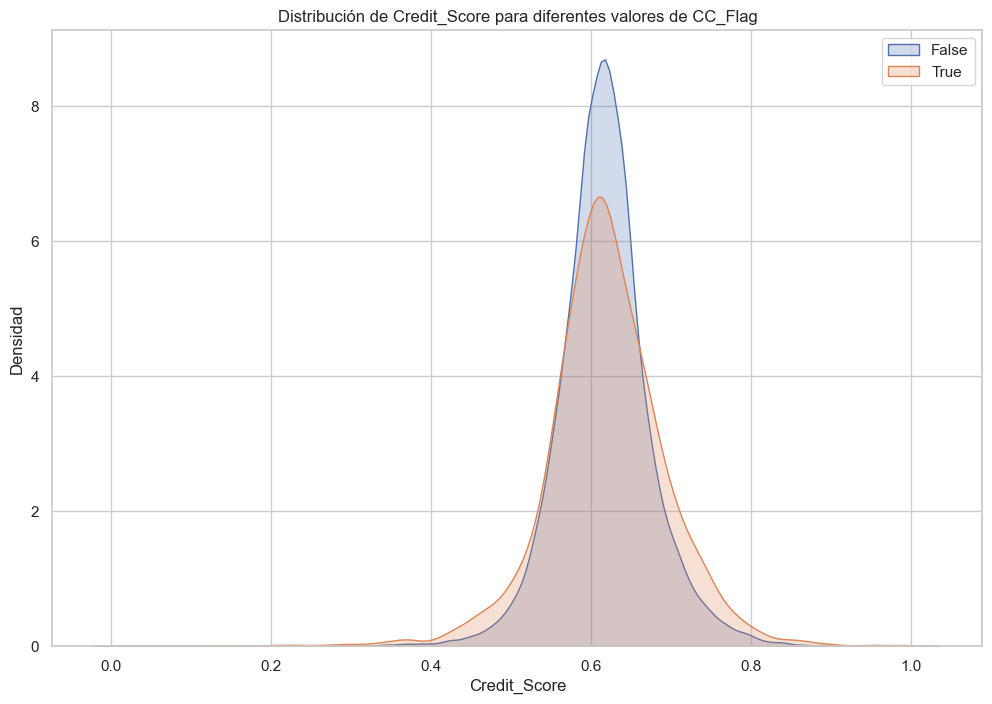


Variable categórica: PL_Flag
Número de categorías únicas: 2
Frecuencia de las categorías principales:
PL_Flag
False    42718
True      8618
Name: count, dtype: int64



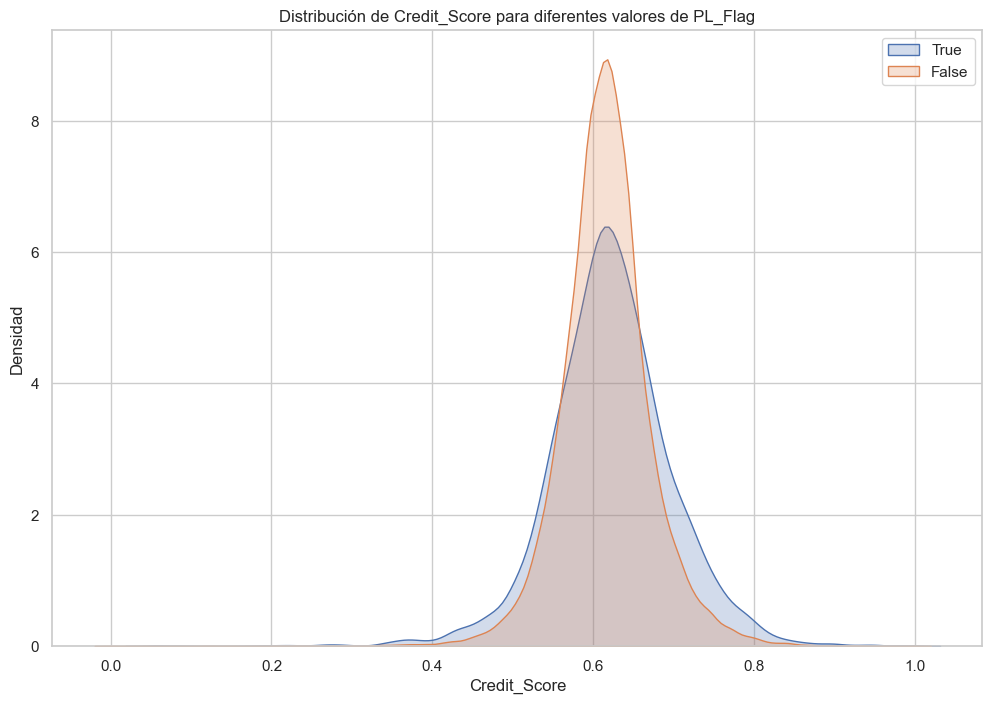


Variable categórica: HL_Flag
Número de categorías únicas: 2
Frecuencia de las categorías principales:
HL_Flag
False    37418
True     13918
Name: count, dtype: int64



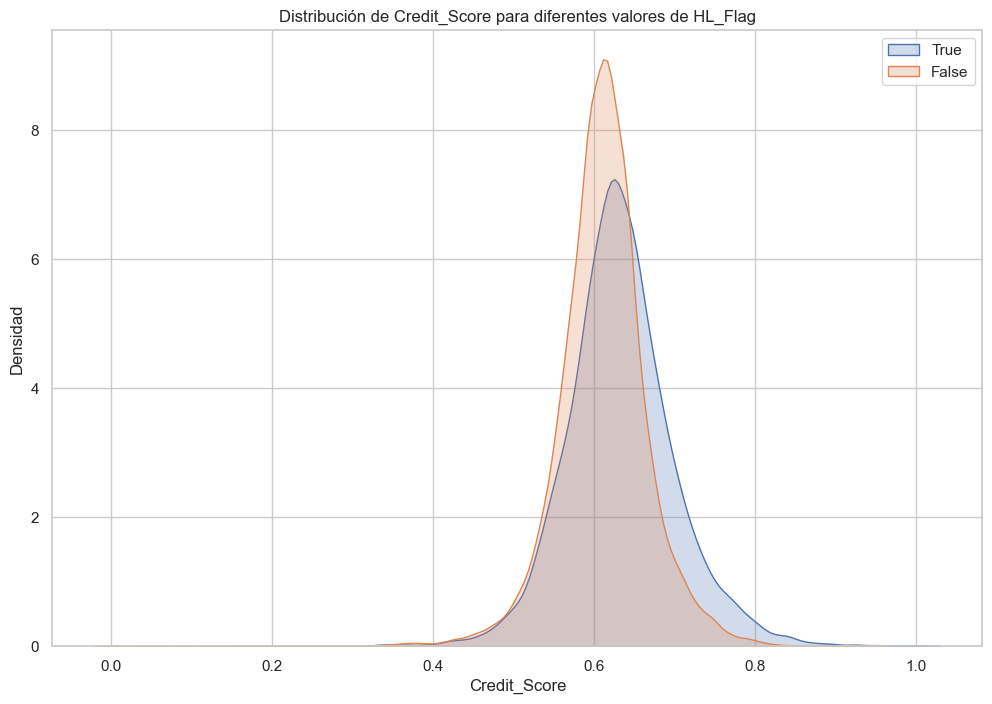


Variable categórica: GL_Flag
Número de categorías únicas: 2
Frecuencia de las categorías principales:
GL_Flag
False    48621
True      2715
Name: count, dtype: int64



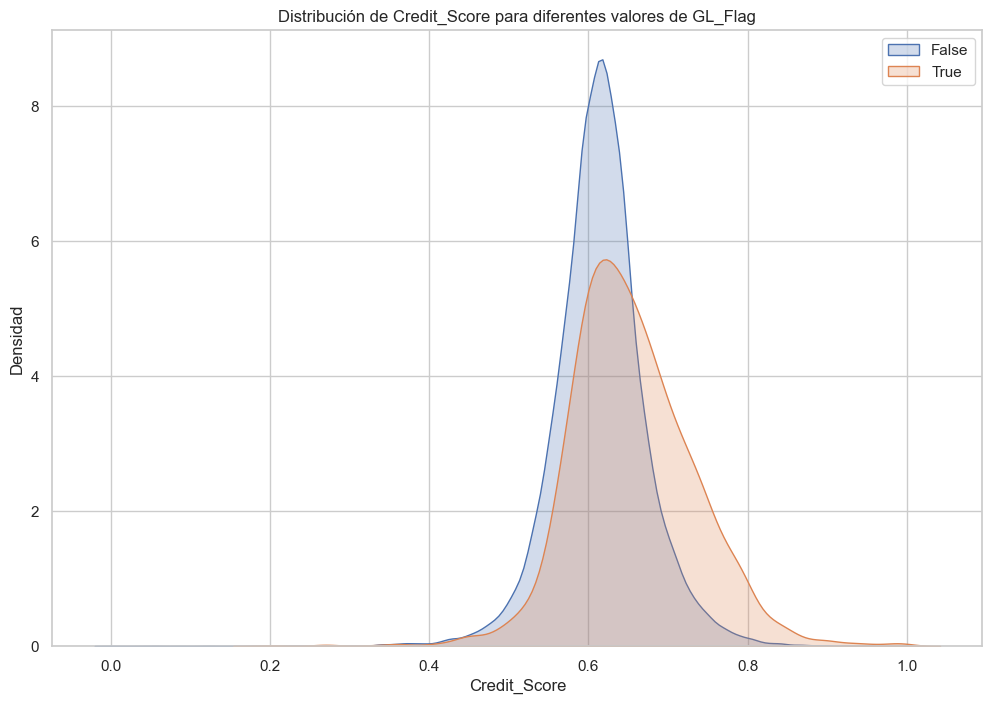


Variable categórica: last_prod_enq2
Número de categorías únicas: 6
Frecuencia de las categorías principales:
last_prod_enq2
others          20831
ConsumerLoan    17793
PL               7959
CC               2339
AL               1511
Name: count, dtype: int64



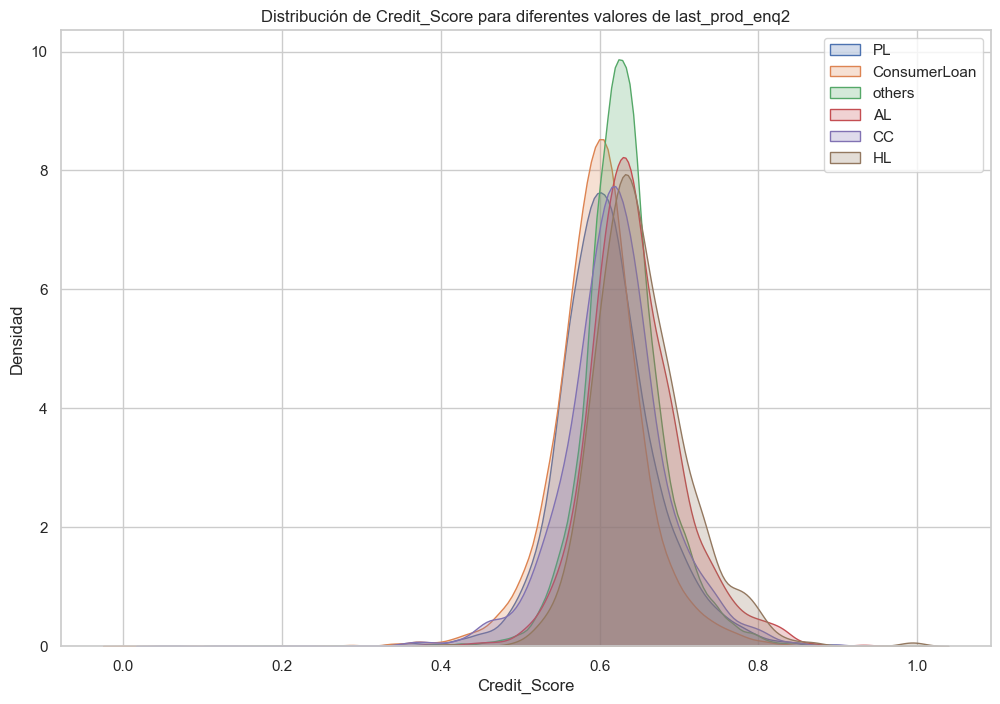


Variable categórica: Approved_Flag
Número de categorías únicas: 4
Frecuencia de las categorías principales:
Approved_Flag
P2    32199
P3     7452
P4     5882
P1     5803
Name: count, dtype: int64



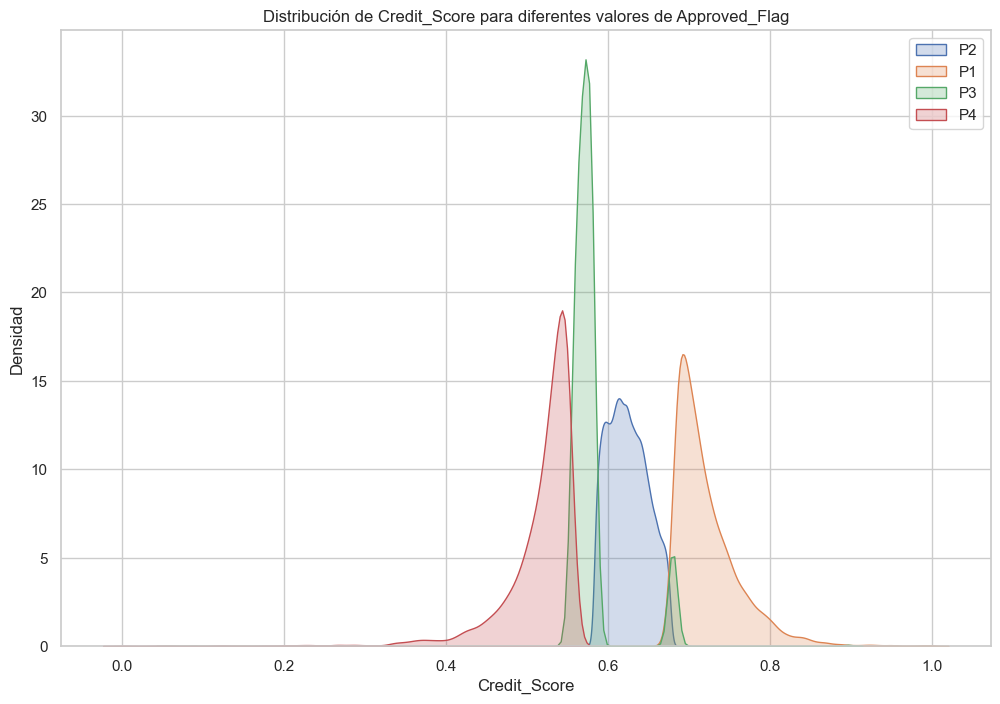


Variable categórica: time_since_recent_deliquency_class
Número de categorías únicas: 4
Frecuencia de las categorías principales:
time_since_recent_deliquency_class
Never         35949
0-9 days       7458
20+ days       4138
10-19 days     3791
Name: count, dtype: int64



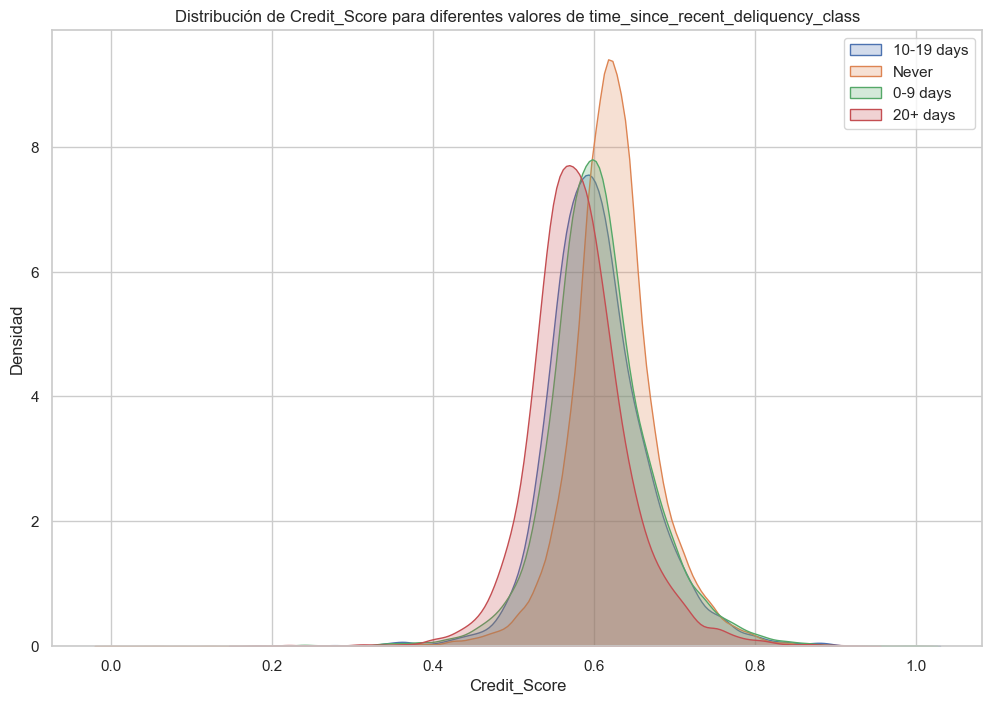

In [ ]:
# Llamamos la función que analiza las variables categóricas frente a la target
Analyze_Categorical_Features_Density(external, cat_features, 'Credit_Score')

1.	Marital Status: Las personas casadas tienden a tener un Credit_Score ligeramente mejor que las personas solteras, aunque la diferencia no es dramática.
2.	Education: Las personas con niveles educativos más altos tienden a tener un Credit_Score ligeramente mejor que las personas con niveles educativos más bajos, aunque la diferencia no es dramática.
3.	Gender: No hay una diferencia significativa en la distribución del Credit_Score entre hombres y mujeres, lo que sugiere que el género no es un factor determinante en el Credit_Score.
4.	CC_Flag: Las personas con tarjeta de crédito tienden a tener un Credit_Score significativamente mejor que las personas sin tarjeta de crédito.
5.	PL_Flag: Las personas con préstamo personal tienden a tener un Credit_Score ligeramente mejor que las personas sin préstamo personal.
6.	HL_Flag: Las personas con préstamo hipotecario tienden a tener un Credit_Score ligeramente mejor que las personas sin préstamo hipotecario.
7.	GL_Flag: Las personas con aval tienden a tener un Credit_Score ligeramente mejor que las personas sin aval.
8.	last_prod_enq2: Las personas que han consultado sobre préstamos personales o de consumo tienden a tener un Credit_Score ligeramente mejor que las personas que han consultado sobre otros tipos de productos financieros.
9.	Approved_Flag: El grupo P1 tiene un Credit_Score significativamente mejor que los otros grupos. Es remalcable la diferencia que existe entre los diferentes niveles de aprobación.

### 4.3. Target VS Variables Numéricas

In [ ]:
# Volvemos a crear la variable que recoge las características numéricas
numeric_features = external.select_dtypes(include=[np.number]).columns
numeric_features = numeric_features.drop(['PROSPECTID', 'Credit_Score'])

In [ ]:
def Analyze_Numeric_Features_Scatter(df, num_features, target_column, hue_column=None):
    '''
    Analiza variables numéricas respecto a una variable objetivo numérica
    mediante scatter plots con una línea de regresión lineal.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - num_features: Lista de variables numéricas en el DataFrame.
    - target_column: Nombre de la variable objetivo numérica.
    - hue_column: (Opcional) Nombre de la variable categórica para definir el color de los puntos.
    '''
    
    print(f"Análisis de variables numéricas respecto a la columna objetivo '{target_column}':\n")
    
    for v_num in num_features:
        if v_num == target_column:
            continue
        
        plt.figure(figsize=(10, 6))
        
        # Graficar scatter plot, con color definido por la variable categórica si se proporciona
        sns.scatterplot(x=df[v_num], y=df[target_column], alpha=0.6, hue=df[hue_column] if hue_column else None)
        
        # Regresión lineal
        model = LinearRegression()
        model.fit(df[[v_num]], df[target_column])
        y_pred = model.predict(df[[v_num]])
        
        # Graficar la línea de regresión lineal
        plt.plot(df[v_num], y_pred, color='red', linestyle='--', label='Regresión lineal')
        
        # Configurar el gráfico
        plt.title(f"Relación entre {v_num} y {target_column}")
        plt.xlabel(v_num)
        plt.ylabel(target_column)
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()


In [ ]:
# Llamamos la función que analiza las variables numéricas frente a la target
Analyze_Numeric_Features_Scatter(external, numeric_features, 'Credit_Score', hue_column='Approved_Flag')

NameError: name 'Analyze_Numeric_Features_Scatter' is not defined

1.	time_since_recent_payment: Un tiempo más largo desde el último pago podría sugerir una mejor gestión de pagos.
2.	recent_level_of_deliq: El nivel reciente de morosidad debería ser un indicador clave de riesgo.
3.	time_since_recent_enq: Un tiempo más largo desde la última consulta podría indicar una menor necesidad de crédito.
4.	num_times_dpd: Un bajo número de veces en mora generalmente se asocia con un menor riesgo.
5.	CC_enq_pca: El valor PCA de las consultas de crédito podría ser un indicador de riesgo.
6.	pct_PL_enq_pca: El valor PCA del porcentaje de consultas de préstamos podría ser un indicador de riesgo.
7.	AGE: La edad podría influir en el Credit_Score de maneras no lineales.
8.	NETMONTHLYINCOME: El ingreso podría ser un factor importante en combinación con otras variables.
9.	Time_With_Curr_Empr: El tiempo con el empleador podría ser un indicador de estabilidad laboral.
10.	pct_of_active_TLs_ever: El porcentaje de líneas de crédito activas podría ser un indicador de buena gestión.
11.	pct_opened_TLs_L6m_of_L12m: El porcentaje de nuevas líneas de crédito podría indicar planificación financiera.
12.	pct_currentBal_all_TL: Un bajo porcentaje del saldo actual generalmente se asocia con menor riesgo.
13.	CC_utilization: Una baja utilización de la tarjeta de crédito generalmente se asocia con menor riesgo.
14.	PL_utilization: Una baja utilización del préstamo personal generalmente se asocia con menor riesgo.
15.	max_deliq_pca: El valor PCA del máximo de morosidad debería ser un indicador clave de riesgo.
16.	num_std_pca: El valor PCA del número de desviaciones estándar podría ser un indicador de riesgo.
17.	num_sub_pca: El valor PCA del número de subgrupos podría ser un indicador de riesgo.
18.	num_dbt_pca: El valor PCA del número de deudas podría ser un indicador de riesgo.
19.	num_Iss_pca: El valor PCA del número de préstamos podría ser un indicador de riesgo.

## 5. Formateado de las Variables Categóricas

In [ ]:
# Crear un objeto OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# Iterar sobre las características categóricas
for column in cat_features:
    print(f"Procesando columna: {column}")
    
    # Aplicar OneHotEncoder
    transformed = ohe.fit_transform(external[[column]])
    
    # Crear un DataFrame con las columnas generadas por el OneHotEncoder
    transformed_df = pd.DataFrame(transformed, columns=ohe.get_feature_names_out([column]))
    
    # Concatenar las nuevas columnas al DataFrame original
    external = pd.concat([external, transformed_df], axis=1)
    
    # Eliminar la columna original (si se desea) después de la transformación
    external.drop(columns=[column], inplace=True)

Procesando columna: MARITALSTATUS
Procesando columna: EDUCATION
Procesando columna: GENDER
Procesando columna: CC_Flag
Procesando columna: PL_Flag
Procesando columna: HL_Flag
Procesando columna: GL_Flag
Procesando columna: last_prod_enq2
Procesando columna: Approved_Flag
Procesando columna: time_since_recent_deliquency_class
